# Problem Statement

  *Huanan Seafood Wholesale Market* merupakan preprints dimana COVID-19 Dimulai. Dengan adanya analisa genetika pada sampel coronavirus yang menyebar sejak Desember 2019. Hal ini menyebabkan outbreak yang luar biasa sehingga memberikan dampak yang signifikan bagi kehidupan manusia. Segala hal yang berhubungan dengan aktivitas manusia dan keadaan negara berubah secara drastis.Dengan prediksi International Monetary Fund yang berupa penurunan Median GDP Global sebesar 3.9% dari tahun 2019 ke 2020 yang membuktikan dampak besar COVID-19. Adanya kekacauan dalam sistem manajemen rumah sakit dimana rumah sakit di seluruh dunia mengalami overlimit pada jumlah pasien yang masuk. Menurut McKinsey 2020 dampak substansial yang diberikan oleh COVID-19 memberikan peningkatan dalam operational cost pada rumah sakit pada United States sebesar 125b USD hingga 200b USD yang merupakan dampak yang cukup signifikan terhadap healtcare system.

Vulnerabilitas masyarakat terhadap virus baru ini membutuhkan akuntabilitas dari beberapa elemen di masyarakat, baik itu pemerintah maupun masyarakat itu sendiri. Penggunaan Masker, Lockdown yang berupaya mengurangi mobilitas masyarakat yang mengurangi tingkat kematian pada 2020 di Eropa dan United States sebesar 2.9%. Lockdown memberikan pengurangan mobilitas sebesar 60%. Dengan adanya efektivitas tersebut, tentu memiliki signifikansi yang besar terhadap kegiatan masyarakat yang berhubungan dengan perekonomian dan kegiatan individu yang memerlukan perpindahan masyarakat dari satu tempat ke tempat lain. Sistem berbasis online yang diberlakukan secara global memberikan signifikansi pada pengurangan mobilitas penduduk sebesar 80% pada Januari 2020. Mobilitas baik pada kendaraan umum, kendaraan pribadi, dan kendaraan lain di Indonesia berkurang secara drastis.

Dengan adanya penurunan mobilitas, terdapat variabel dependen lain yaitu kandungan karbon monoksia dan PM25 yang menurun pada tahun 2020. Pada April 2020 jika dibandingkan dengan tahun 2019, terdapat penurunan polusi udara sebesar 26%. Akan tetapi, dengan adanya penurunan kasus dalam kurun waktu 2.5 tahun, apakah COVID-19 akan melonjak lagi di masa depan? apakah mobilitas akan meningkat pada 2022 dan apakah kadar Karbon Monoksida dan PM25 akan meningkat secara signifikan?

Untuk menjawab pertanyaan tersebut, kami menggunakan 5 Dataset untuk menganalisis prediksi tingkat positif harian covid-19,mobilitas penduduk, dan juga kadar karbon monoksida dan PM25 menggunakan Time Series

#Data Cleaning and Preprocessing

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.3 MB/s 
     |████████████████████████████████| 16.7 MB 29.3 MB/s 
     |████████████████████████████████| 6.3 MB 18.3 MB/s 


In [ ]:
!pip install pyshp
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 1.3 MB 17.0 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
     |████████████████████████████████| 53 kB 2.9 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=ff8f6a1a88229c3d25cdc17f32879859823fb8accc8e1aff299210ac2e9653c1
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile,os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import json
from googletrans import Translator
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Compfest Datasets'

/content/drive/.shortcut-targets-by-id/1ATkMTvUyZO3sOaSbXBrLGga7G9AtZMdM/Compfest Datasets


Dataset pertama merupakan dataset PM2.5 dari tahun 2014 hingga 2019. Perlu dilakukan Cleaning data agar EDA dan Pemodelan dapat dilakukan secara lancar

In [ ]:
df = pd.read_excel('air_pollution.xlsx')

In [ ]:
df_clean = df.drop(['PM10 temporal coverage (%)','NO2 temporal coverage (%)','PM10 (μg/m3)','NO2 (μg/m3)','ISO3', 'Reference', 'Status', 'Number and type of monitoring stations', 'City or Locality', 'WHO Region', 'Version of the database' ], axis=1)
df_clean.rename(columns = {'WHO Country Name' : 'region'},inplace = True)
df_clean.drop(df_clean[df_clean['region'] != "Indonesia"].index, inplace = True)
df_clean.dropna(subset=['PM25 temporal coverage (%)'],inplace = True)
df_clean.sort_values('Measurement Year',inplace = True)
df_clean.reset_index(inplace = True)
df_clean = df_clean.drop(['index'],axis = 1)
df_clean

,region,Measurement Year,PM2.5 (μg/m3),PM25 temporal coverage (%)
0,Indonesia,2014,33.00,75.000000
1,Indonesia,2015,33.55,2.773973
2,Indonesia,2015,29.42,3.013699
3,Indonesia,2016,44.86,90.536530
4,Indonesia,2016,40.35,98.599727
5,Indonesia,2016,42.74,98.724954
6,Indonesia,2017,28.09,96.152968
7,Indonesia,2017,32.03,89.200913
8,Indonesia,2018,37.48,97.773973
9,Indonesia,2018,45.02,94.970131


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region                      11 non-null     object 
 1   Measurement Year            11 non-null     int64  
 2   PM2.5 (μg/m3)               11 non-null     float64
 3   PM25 temporal coverage (%)  11 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 480.0+ bytes


Dataset Kedua merupakan Dataset yang berasal dari Google Mobility data yang menyajikan data mobilitas dunia

In [ ]:
global_data = pd.read_csv('google_mobility.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Dilakukan Filtering Data yang sehingga Dataset yang digunakan hanya berupa data dari Indonesia pada Tahun 2020. Data ini akan digunakan untuk menganalisis lokasi Indonesia yang memiliki Mobilitas Tertinggi dan Prediksi Mobilitas kedepan

In [ ]:

global_data.drop(global_data[global_data['country_region'] != "Indonesia"].index, inplace = True)
global_clean = global_data.drop(['country_region_code','wikidata','short_code','sub_region_2','lat','lng'], axis=1)
global_clean.rename(columns = {'country_region' : 'region'},inplace = True)
global_clean.dropna(subset=['sub_region_1'],inplace = True)
global_clean.reset_index(inplace=True,col_level=1)
global_clean = global_clean.drop(['index'],axis = 1)
global_clean


,region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Indonesia,Aceh,2020-02-15,-1.0,-2.0,-7.0,-3.0,3.0,2.0
1,Indonesia,Aceh,2020-02-16,4.0,3.0,5.0,4.0,3.0,1.0
2,Indonesia,Aceh,2020-02-17,4.0,1.0,5.0,10.0,8.0,0.0
3,Indonesia,Aceh,2020-02-18,0.0,-1.0,0.0,0.0,5.0,1.0
4,Indonesia,Aceh,2020-02-19,-2.0,-3.0,2.0,4.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...
3021,Indonesia,West Sumatra,2020-05-09,-45.0,-25.0,-56.0,-62.0,-32.0,19.0
3022,Indonesia,West Sumatra,2020-05-10,-47.0,-24.0,-59.0,-64.0,-6.0,15.0
3023,Indonesia,West Sumatra,2020-05-11,-36.0,-14.0,-40.0,-55.0,-35.0,17.0
3024,Indonesia,West Sumatra,2020-05-12,-41.0,-17.0,-43.0,-55.0,-37.0,17.0


In [ ]:
global_clean['sub_region_1']= global_clean['sub_region_1'].astype('str')
global_clean['sub_region_1']=global_clean['sub_region_1'].str.upper()
global_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   region                                              3026 non-null   object 
 1   sub_region_1                                        3026 non-null   object 
 2   date                                                3026 non-null   object 
 3   retail_and_recreation_percent_change_from_baseline  3026 non-null   float64
 4   grocery_and_pharmacy_percent_change_from_baseline   3026 non-null   float64
 5   parks_percent_change_from_baseline                  3026 non-null   float64
 6   transit_stations_percent_change_from_baseline       3002 non-null   float64
 7   workplaces_percent_change_from_baseline             3026 non-null   float64
 8   residential_percent_change_from_baseline            3026 non-null   float64
dty

In [ ]:
global_clean['date'] = pd.to_datetime(global_clean['date'])
global_clean['date'] = [d.strftime('%Y-%m') if not pd.isnull(d) else '' for d in global_clean['date']]
global_clean = global_clean.groupby(['sub_region_1','date'],as_index = False).sum()
global_clean.rename(columns = {'retail_and_recreation_percent_change_from_baseline' : 'retail and recreation','grocery_and_pharmacy_percent_change_from_baseline':'grovcery and pharmacy'},inplace = True)
global_clean.rename(columns = {'parks_percent_change_from_baseline' : 'parks','transit_stations_percent_change_from_baseline':'transit stations','workplaces_percent_change_from_baseline':'workplaces','residential_percent_change_from_baseline':'residential'},inplace = True)
global_clean

,sub_region_1,date,retail and recreation,grovcery and pharmacy,parks,transit stations,workplaces,residential
0,ACEH,2020-02,2.0,-11.0,36.0,10.0,96.0,14.0
1,ACEH,2020-03,-275.0,-48.0,-246.0,-302.0,-171.0,155.0
2,ACEH,2020-04,-788.0,-394.0,-804.0,-1418.0,-664.0,307.0
3,ACEH,2020-05,-369.0,-143.0,-445.0,-693.0,-291.0,156.0
4,BALI,2020-02,-55.0,-20.0,0.0,-107.0,-261.0,46.0
...,...,...,...,...,...,...,...,...
131,WEST SULAWESI,2020-05,-450.0,-283.0,-730.0,-818.0,-312.0,205.0
132,WEST SUMATRA,2020-02,-9.0,-10.0,-45.0,-30.0,92.0,6.0
133,WEST SUMATRA,2020-03,-344.0,-76.0,-518.0,-455.0,-232.0,172.0
134,WEST SUMATRA,2020-04,-1175.0,-610.0,-1361.0,-1584.0,-1007.0,445.0


In [ ]:
global_clean['retail and recreation'] = MinMaxScaler().fit_transform(np.array(global_clean['retail and recreation']).reshape(-1,1))
global_clean['grovcery and pharmacy'] = MinMaxScaler().fit_transform(np.array(global_clean['grovcery and pharmacy']).reshape(-1,1))
global_clean['parks'] = MinMaxScaler().fit_transform(np.array(global_clean['parks']).reshape(-1,1))
global_clean['transit stations'] = MinMaxScaler().fit_transform(np.array(global_clean['transit stations']).reshape(-1,1))
global_clean['workplaces'] = MinMaxScaler().fit_transform(np.array(global_clean['workplaces']).reshape(-1,1))
global_clean['residential'] = MinMaxScaler().fit_transform(np.array(global_clean['residential']).reshape(-1,1))
global_clean

,sub_region_1,date,retail and recreation,grovcery and pharmacy,parks,transit stations,workplaces,residential
0,ACEH,2020-02,0.990692,0.957786,0.817209,0.860185,0.987952,0.024602
1,ACEH,2020-03,0.829552,0.923077,0.691485,0.734833,0.809237,0.228654
2,ACEH,2020-04,0.531123,0.598499,0.442711,0.286460,0.479250,0.448625
3,ACEH,2020-05,0.774869,0.833959,0.602764,0.577742,0.728916,0.230101
4,BALI,2020-02,0.957533,0.949343,0.801159,0.813178,0.748996,0.070912
...,...,...,...,...,...,...,...,...
131,WEST SULAWESI,2020-05,0.727749,0.702627,0.475702,0.527521,0.714859,0.301013
132,WEST SUMATRA,2020-02,0.984293,0.958724,0.781097,0.844114,0.985274,0.013025
133,WEST SUMATRA,2020-03,0.789412,0.896811,0.570218,0.673363,0.768407,0.253256
134,WEST SUMATRA,2020-04,0.305992,0.395872,0.194383,0.219767,0.249665,0.648336


In [ ]:
global_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sub_region_1           136 non-null    object 
 1   date                   136 non-null    object 
 2   retail and recreation  136 non-null    float64
 3   grovcery and pharmacy  136 non-null    float64
 4   parks                  136 non-null    float64
 5   transit stations       136 non-null    float64
 6   workplaces             136 non-null    float64
 7   residential            136 non-null    float64
dtypes: float64(6), object(2)
memory usage: 8.6+ KB


# Exploratory Data Analysis

## Exploratory Data Analysis Covid 19

In [ ]:
import requests 
data = requests.get("https://data.covid19.go.id/public/api/skor.json").json()
print(data)

In [ ]:
pdObj = pd.DataFrame.from_dict(data["data"])
pdObj

,prov,kode_prov,kota,kode_kota,hasil
0,DKI JAKARTA,31,JAKARTA SELATAN,3174,RESIKO RENDAH
1,JAWA BARAT,32,CIANJUR,3203,RESIKO RENDAH
2,JAWA BARAT,32,BANDUNG,3204,RESIKO RENDAH
3,JAWA BARAT,32,CIAMIS,3207,TIDAK ADA KASUS
4,JAWA BARAT,32,BEKASI,3216,RESIKO RENDAH
...,...,...,...,...,...
509,PAPUA,91,LANNY JAYA,9123,TIDAK ADA KASUS
510,PAPUA,91,PUNCAK,9125,TIDAK ADA KASUS
511,PAPUA,91,INTAN JAYA,9127,RESIKO RENDAH
512,PAPUA BARAT,92,FAKFAK,9203,RESIKO RENDAH


In [ ]:
pdObj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prov       514 non-null    object
 1   kode_prov  514 non-null    object
 2   kota       514 non-null    object
 3   kode_kota  514 non-null    object
 4   hasil      514 non-null    object
dtypes: object(5)
memory usage: 20.2+ KB


Klasifikasi data berdasarkan nama provinsi, sehingga perlu drop kolom kode prov, kota, dan kode kota.

Lakukan konversi komponen kolom hasil sebagai berikut : TIDAK ADA KASUS sebagai 0, RESIKO RENDAH sebagai 1, RESIKO SEDANG sebagai 2. 

Setelah itu, gabungkan data berdasarkan kolom provinsi, dengan hasil penjumlahan dari kolom hasil sebagai value baru kolom tersebut.

In [ ]:

# We classify the data based on nama provinsi, so we drop kode prov, kota, and kode kota columns

pdObj = pdObj.drop(['kode_prov','kota','kode_kota'], axis = 1)
pdObj['hasil']= pdObj['hasil'].astype('str')

# Convert the value of each hasil component : TIDAK ADA KASUS as 0, RESIKO RENDAH as 1, and RESIKO SEDANG as 2
pdObj['hasil'] = pdObj['hasil'].replace(['TIDAK ADA KASUS','RESIKO RENDAH','RESIKO SEDANG'],[0,1,2])

# Concantenate the data based on provinsi, with sum of the hasil as the new component (the higher the hasil value is, the higher risk of covid-19 infection in that provinsi)
new= pd.DataFrame(pdObj.groupby(['prov'])['hasil'].sum().sort_values(ascending=False).reset_index())
new.rename(columns = {'prov' : 'PROVINSI'},inplace = True)
new

,PROVINSI,hasil
0,JAWA TIMUR,38
1,JAWA TENGAH,34
2,JAWA BARAT,25
3,SULAWESI SELATAN,20
4,NUSA TENGGARA TIMUR,18
5,ACEH,16
6,SUMATERA UTARA,16
7,SUMATERA SELATAN,14
8,PAPUA,12
9,KALIMANTAN BARAT,12


In [ ]:
import geopandas as gpd
spatial = gpd.read_file('/content/drive/MyDrive/Compfest Datasets//BATAS PROVINSI DESEMBER 2019 DUKCAPIL/BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp').to_crs({'init': 'epsg:4326'})
spatial

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."
5,6,DKI JAKARTA,3.123689,0.053426,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ..."
6,7,GORONTALO,11.013237,0.977600,"MULTIPOLYGON Z (((121.42536 0.41243 0.00003, 1..."
7,8,JAMBI,11.835072,3.977711,"MULTIPOLYGON Z (((104.40714 -0.86371 0.00003, ..."
8,9,JAWA BARAT,11.614950,3.032785,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ..."
9,10,JAWA TENGAH,15.456349,2.819838,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ..."


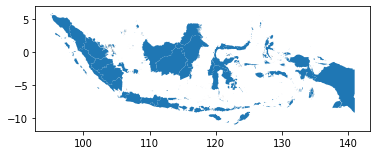

In [ ]:
spatial = spatial.drop(['Shape_Area', 'Shape_Leng', 'OBJECTID'], axis=1)
spatial.plot()

In [ ]:
new_one = pd.merge(left = spatial, right = new, how = 'left',on = "PROVINSI")

In [ ]:
new_one

,PROVINSI,geometry,hasil
0,ACEH,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97...",16
1,BALI,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",9
2,BANTEN,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",9
3,BENGKULU,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ...",3
4,DAERAH ISTIMEWA YOGYAKARTA,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",5
5,DKI JAKARTA,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ...",6
6,GORONTALO,"MULTIPOLYGON Z (((121.42536 0.41243 0.00003, 1...",1
7,JAMBI,"MULTIPOLYGON Z (((104.40714 -0.86371 0.00003, ...",3
8,JAWA BARAT,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ...",25
9,JAWA TENGAH,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ...",34


In [ ]:
df_spatial = new_one[['PROVINSI','hasil']]
df_spatial

,PROVINSI,hasil
0,ACEH,16
1,BALI,9
2,BANTEN,9
3,BENGKULU,3
4,DAERAH ISTIMEWA YOGYAKARTA,5
5,DKI JAKARTA,6
6,GORONTALO,1
7,JAMBI,3
8,JAWA BARAT,25
9,JAWA TENGAH,34


Visualisasi data juga dilakukan secara geografis, menggunakan dataset untuk visualisasi daerah secara geometri serta data risiko yang telah diproses sebelumnya.

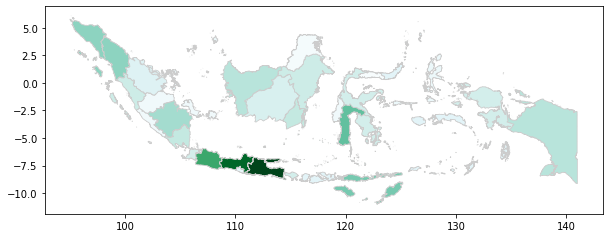

In [ ]:
variable = 'hasil'
vmin,vmax = 120,220
fig, ax = plt.subplots(1, figsize=(10, 6))
new_one.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor = '0.8')

In [ ]:
google = pd.read_excel("Daily Update Data Agregat Covid-19 Jakarta (1).xlsx")
google

,Tanggal,Jam,Tanggal Jam,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
0,2020-03-01,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-02,NaN,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-03,NaN,NaN,1,0,0,2,3,3,2,0,NaN,NaN,NaN
3,2020-03-04,NaN,NaN,1,0,0,2,3,0,2,0,NaN,NaN,NaN
4,2020-03-05,NaN,NaN,3,0,0,4,7,4,4,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,2022-07-02,NaN,NaN,15317,1247144,8675,688,1271824,983,9363,1164,0.0,24.0,9339.0
854,2022-07-03,NaN,NaN,15320,1248357,8333,745,1272755,931,9078,1213,0.0,18.0,9060.0
855,2022-07-04,NaN,NaN,15323,1249496,7937,736,1273492,737,8673,1139,0.0,14.0,8659.0
856,2022-07-05,NaN,NaN,15325,1250388,8267,788,1274768,1276,9055,892,0.0,52.0,9003.0


In [ ]:
google_progress = pd.DataFrame(google,columns =['Tanggal','Positif Harian','Meninggal','Sembuh','Bergejala','Self Isolation'])
google_progress['Tanggal'] = pd.to_datetime(google_progress['Tanggal'])
google_progress['Tanggal'] = [d.strftime('%Y-%m') if not pd.isnull(d) else '' for d in google_progress['Tanggal']]
google_progress['Tanggal']
google_progress.groupby(['Tanggal']).sum()
#google_progress.sort_values(by='Tanggal',ascending = False)

,Positif Harian,Meninggal,Sembuh,Bergejala,Self Isolation
Tanggal,,,,,
2020-03,741,688,397,0.0,1485
2020-04,3397,7120,5838,0.0,19361
2020-05,3134,14520,38336,0.0,61934
2020-06,4004,17430,126899,0.0,87482
2020-07,9925,22483,307355,82326.0,127656
2020-08,19108,31528,637228,292296.0,175779
2020-09,34059,44383,1330343,263403.0,243786
2020-10,31229,61896,2390147,139747.0,310620
2020-11,31264,73765,3285245,122170.0,174552


Visualisasi Kasus Positif Harian Covid-19 Jakarta

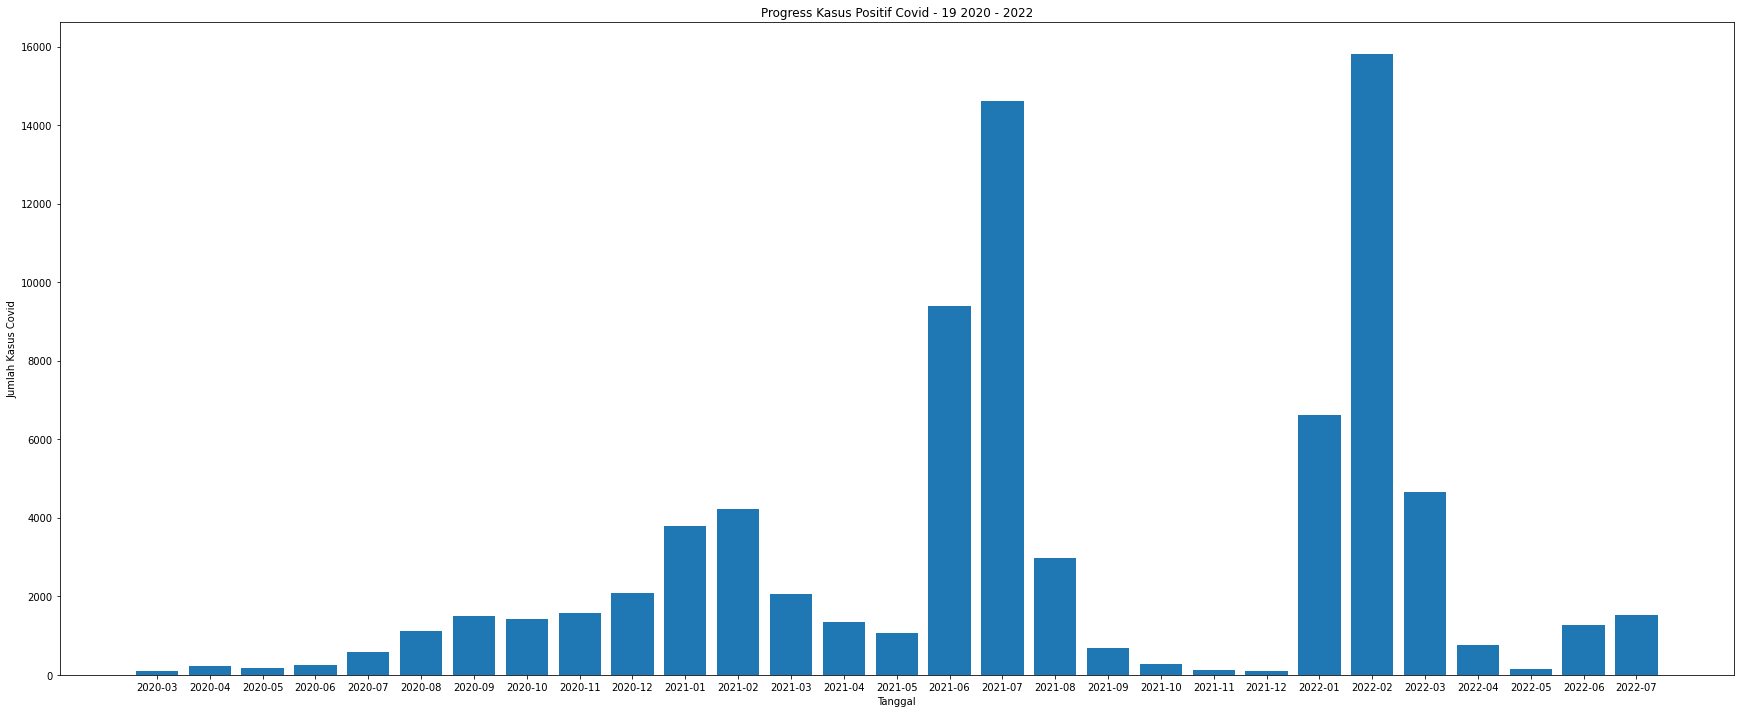

In [ ]:
fig = plt.figure(figsize = (30,12))
x2_plot = google_progress['Tanggal']
y2_plot = google_progress['Positif Harian']
 
plt.bar(x2_plot,y2_plot)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Covid")
plt.title("Progress Kasus Positif Covid - 19 2020 - 2022")
plt.show()

Visualisasi Kasus Meninggal Covid-19 Jakarta

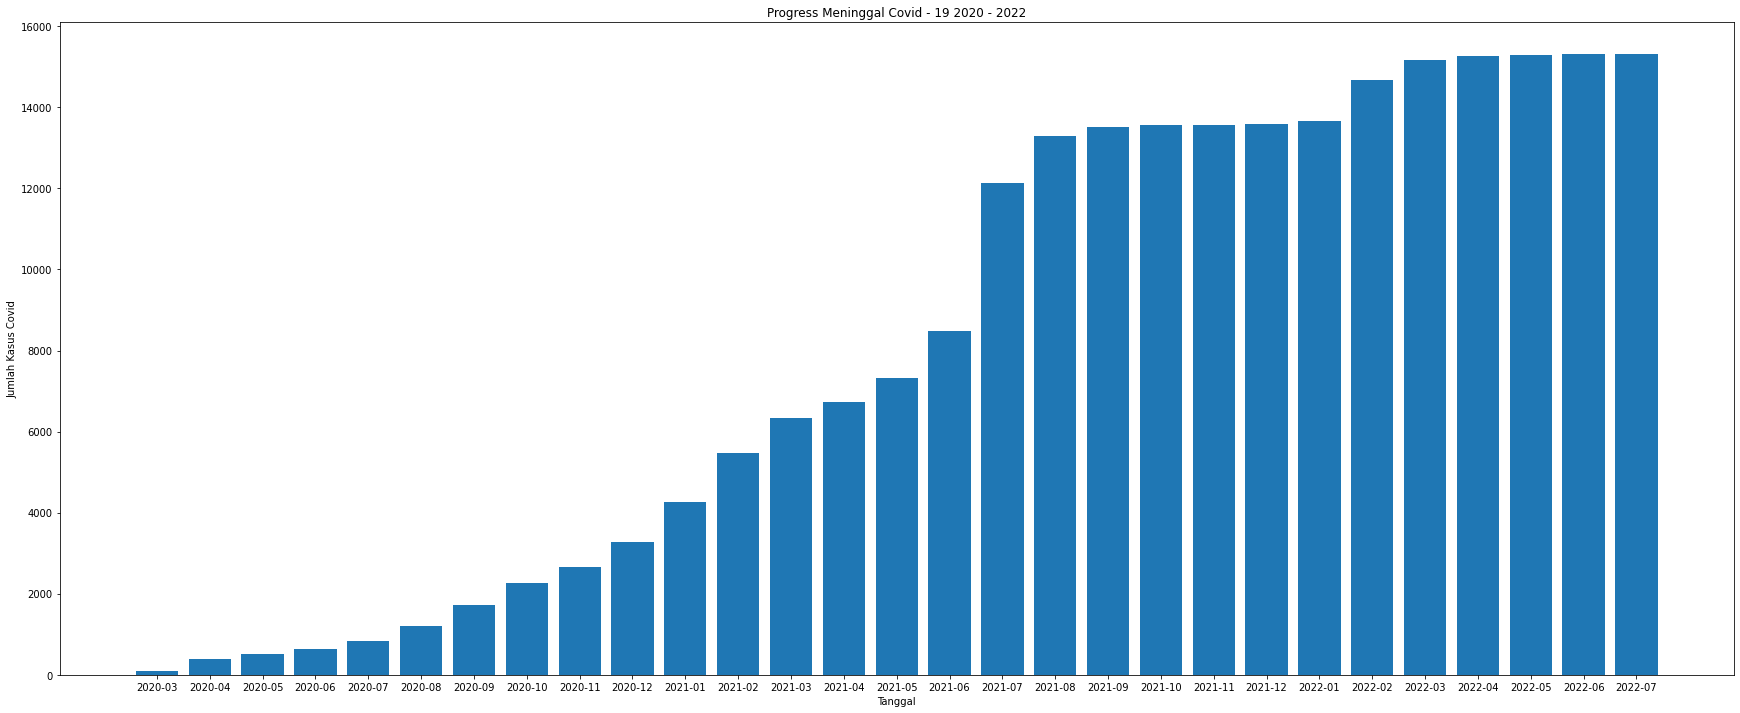

In [ ]:
fig = plt.figure(figsize = (30,12))
x3_plot = google_progress['Tanggal']
y3_plot = google_progress['Meninggal']
 
plt.bar(x3_plot,y3_plot)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kasus Covid")
plt.title("Progress Meninggal Covid - 19 2020 - 2022")
plt.show()

In [ ]:
# import plotly.graph_objects as go
# import folium
# from folium import plugins
# # Manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10, 12
# # Disable warnings
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
google = google.drop(['Jam','Tanggal Jam','Belum Ada Data'],axis = 1)

In [ ]:
google['Tanggal'] = pd.to_datetime(google['Tanggal'])
google['Tanggal'] = [d.strftime('%Y-%m-%d') if not pd.isnull(d) else '' for d in google['Tanggal']]
google = google.sort_values('Tanggal',ascending = True)

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 857
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tanggal          858 non-null    object 
 1   Meninggal        858 non-null    int64  
 2   Sembuh           858 non-null    int64  
 3   Self Isolation   858 non-null    int64  
 4   Masih Perawatan  858 non-null    int64  
 5   Total Pasien     858 non-null    int64  
 6   Positif Harian   858 non-null    int64  
 7   Positif Aktif    858 non-null    int64  
 8   Sembuh Harian    858 non-null    int64  
 9   Tanpa Gejala     718 non-null    float64
 10  Bergejala        718 non-null    float64
dtypes: float64(2), int64(8), object(1)
memory usage: 80.4+ KB


In [ ]:
google = google.groupby(['Tanggal']).sum().reset_index()

In [ ]:
#google['Positif Aktif'] = MinMaxScaler().fit_transform(np.array(google['Positif Aktif']).reshape(-1,1))
google

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,0.0
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,0.0
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,0.0
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,0.0
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
853,2022-07-02,15317,1247144,8675,688,1271824,983,9363,1164,0.0,24.0
854,2022-07-03,15320,1248357,8333,745,1272755,931,9078,1213,0.0,18.0
855,2022-07-04,15323,1249496,7937,736,1273492,737,8673,1139,0.0,14.0
856,2022-07-05,15325,1250388,8267,788,1274768,1276,9055,892,0.0,52.0


In [ ]:
google_progress = google_progress.groupby(['Tanggal']).sum().reset_index()

In [ ]:
google_progress

,Tanggal,Positif Harian,Meninggal,Sembuh,Bergejala,Self Isolation
0,2020-03,741,688,397,0.0,1485
1,2020-04,3397,7120,5838,0.0,19361
2,2020-05,3134,14520,38336,0.0,61934
3,2020-06,4004,17430,126899,0.0,87482
4,2020-07,9925,22483,307355,82326.0,127656
5,2020-08,19108,31528,637228,292296.0,175779
6,2020-09,34059,44383,1330343,263403.0,243786
7,2020-10,31229,61896,2390147,139747.0,310620
8,2020-11,31264,73765,3285245,122170.0,174552
9,2020-12,46874,92897,4425873,201099.0,274039


Visualisasi Kasus Positif Aktif Covid-19 Jakarta

In [ ]:
import plotly.express as px
figure = px.bar(google_progress.loc[google_progress['Tanggal']>='2021-03'], x='Tanggal', y='Positif Harian', color="Positif Harian", color_continuous_scale=px.colors.sequential.BuGn)
figure.update_layout(title_text='Kasus Positif Aktif di Indonesia')
figure.show()

Visualisasi Kasus Meninggal Covid-19 Jakarta

In [ ]:
figure = px.bar(google_progress.loc[google_progress['Tanggal']>='2021-03'], x='Tanggal', y='Meninggal', color="Meninggal", color_continuous_scale=px.colors.sequential.BuGn)
figure.update_layout(title_text='Kasus Meninggal di Indonesia')
figure.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

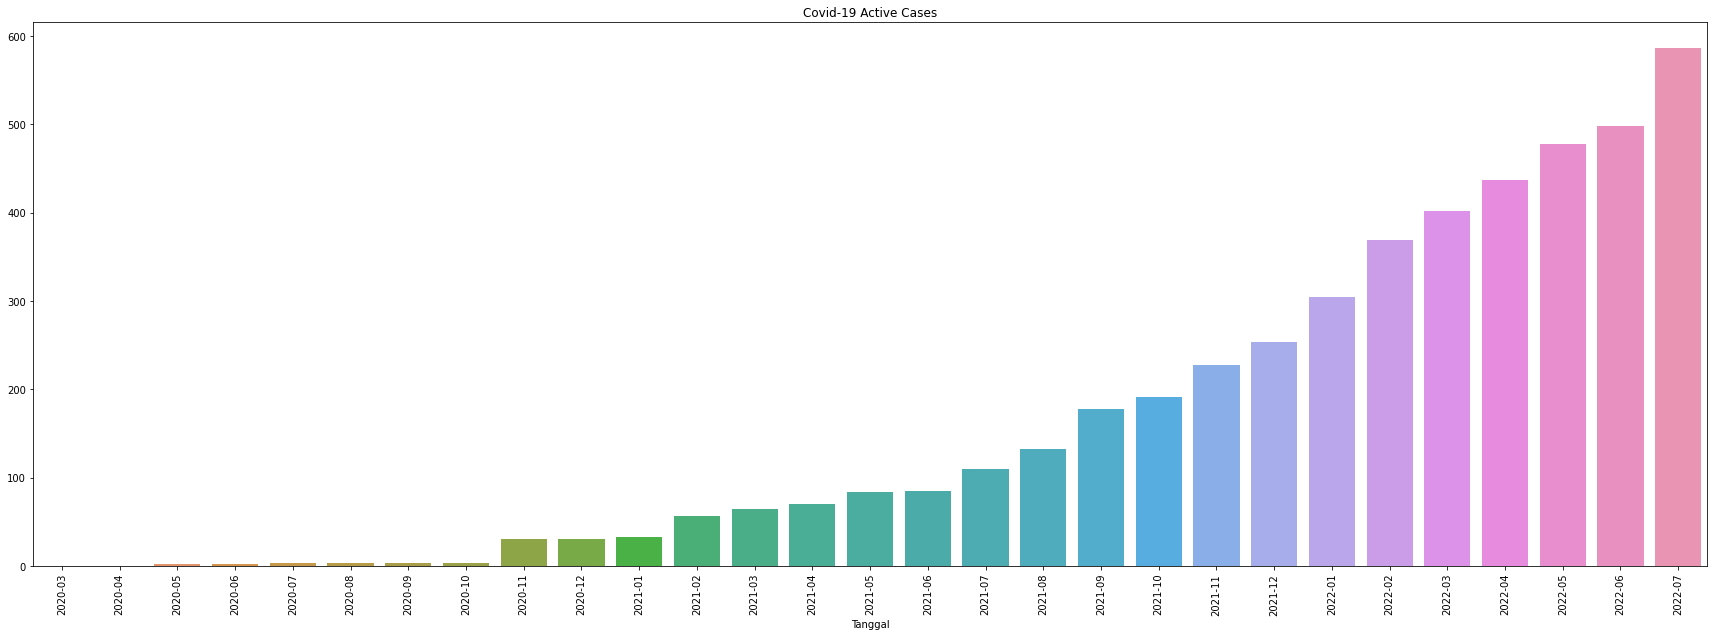

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x=google_progress['Tanggal'],y=google['Total Pasien']-google["Sembuh"]-google["Meninggal"])
plt.title("Covid-19 Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

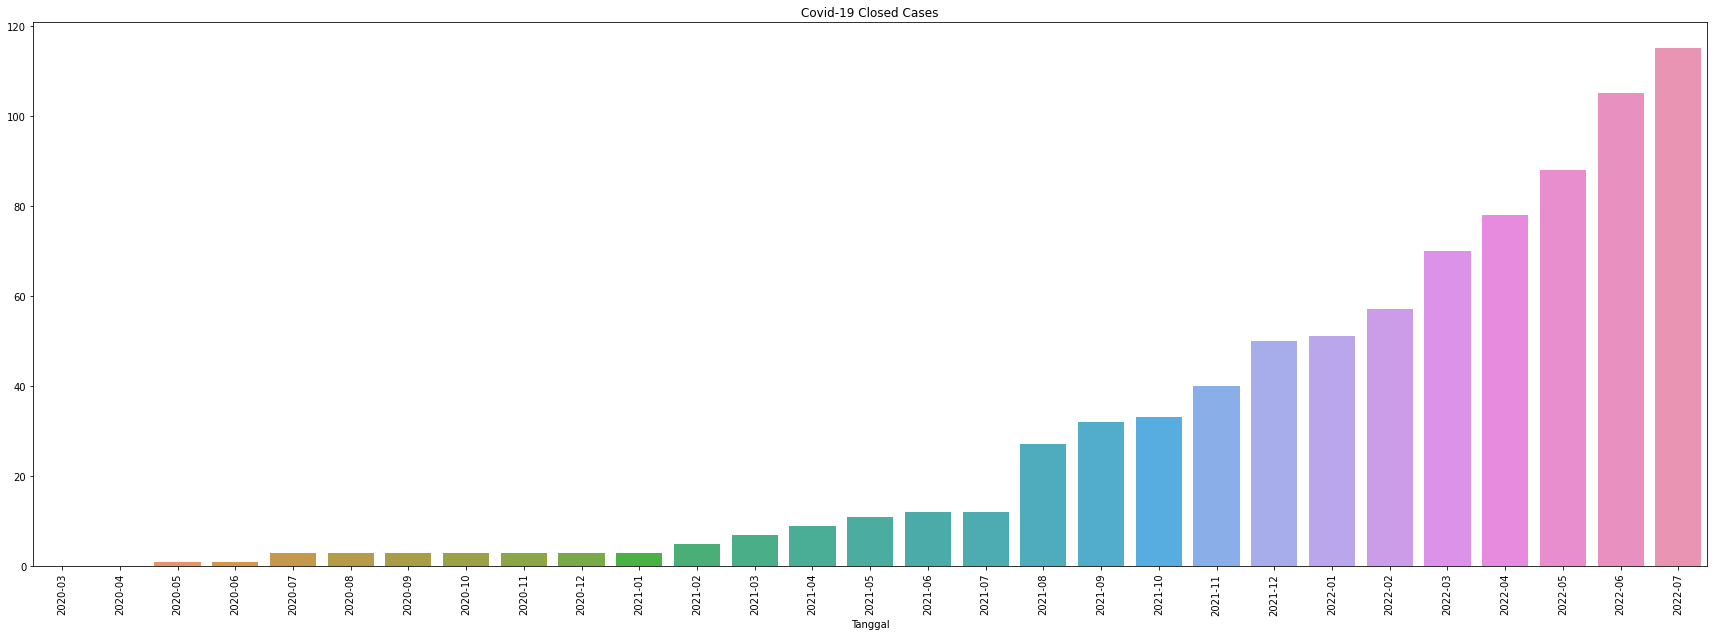

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x=google_progress['Tanggal'],y=google["Sembuh"]+google["Meninggal"])
plt.title("Covid-19 Closed Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

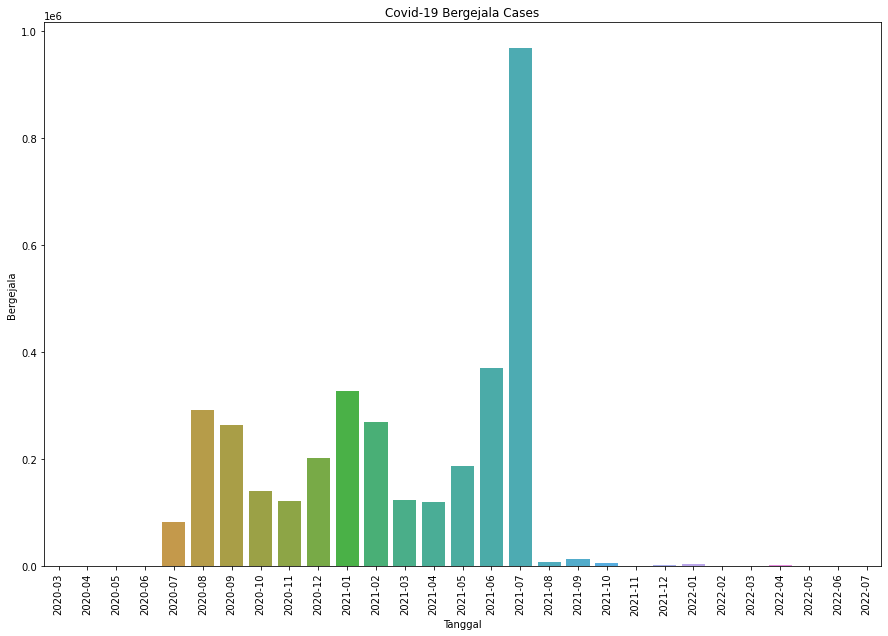

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=google_progress['Tanggal'],y=google_progress["Bergejala"])
plt.title("Covid-19 Bergejala Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

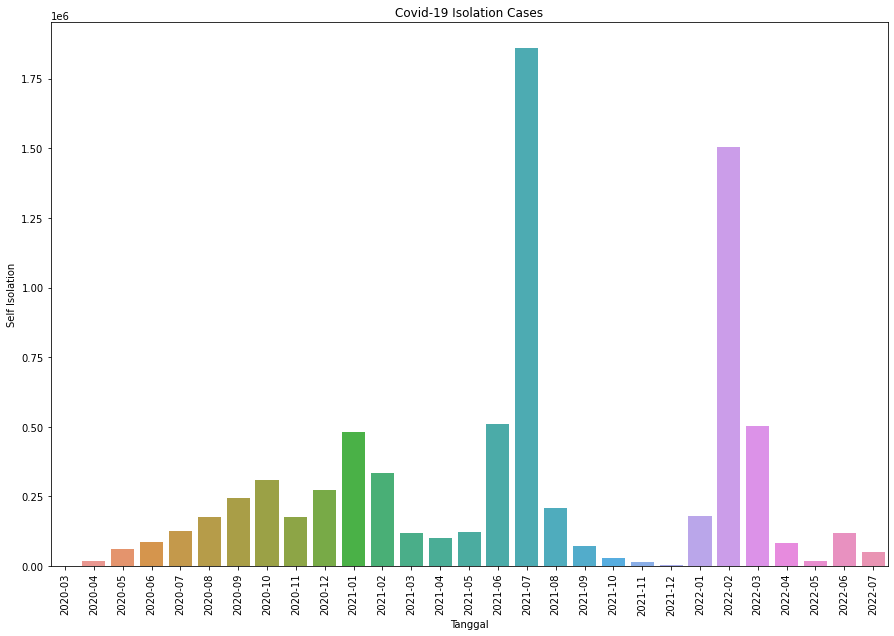

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=google_progress['Tanggal'],y=google_progress["Self Isolation"])
plt.title("Covid-19 Isolation Cases")
plt.xticks(rotation=90)

No handles with labels found to put in legend.


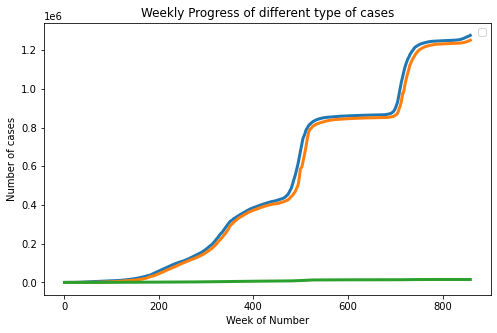

In [ ]:
google['dated'] = google['Tanggal']
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(google["dated"].unique()):
    weekwise_confirmed.append(google[google["dated"]==i]["Total Pasien"].iloc[-1])
    weekwise_recovered.append(google[google["dated"]==i]["Sembuh"].iloc[-1])
    weekwise_deaths.append(google[google["dated"]==i]["Meninggal"].iloc[-1])
    week_num.append(w)
    w=w+1
    
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("Week of Number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different type of cases")
plt.legend (loc = 1)
plt.show()

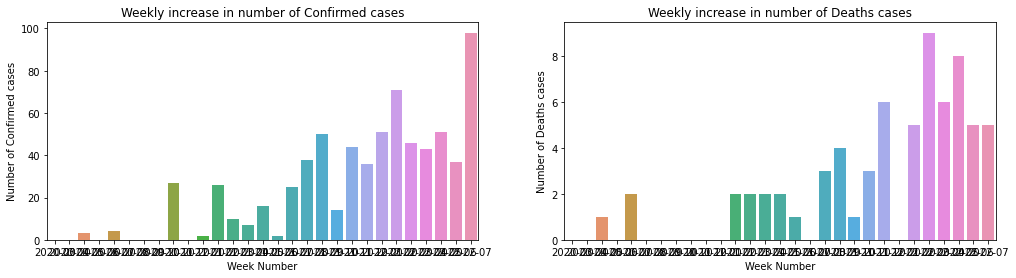

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(17,4))
sns.barplot(x= google_progress['Tanggal'],y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= google_progress['Tanggal'],y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed cases")
ax2.set_ylabel("Number of Deaths cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Deaths cases")
plt.show()

Average increase in number of Confirmed cases everyday: 2.0
Average increase in number of Deaths cases everyday: 18.0


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text major ticklabel objects>)

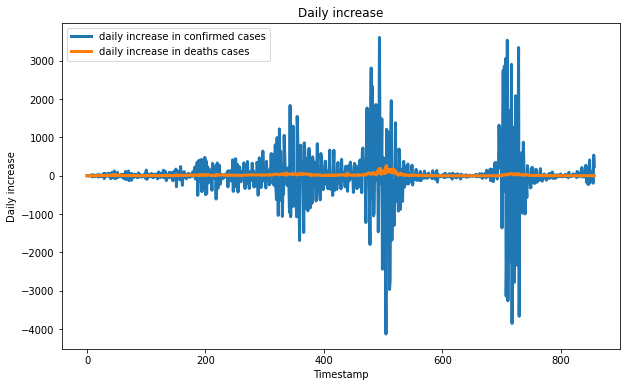

In [ ]:
print("Average increase in number of Confirmed cases everyday:",np.round(google["Positif Harian"].diff().fillna(0).mean()))
#print("Average increase in number of Recovered cases everyday:",np.round(google["Sembuh"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday:",np.round(google["Meninggal"].diff().fillna(0).mean()))

plt.figure(figsize=(10,6))
plt.plot(google["Positif Harian"].diff().fillna(0),label="daily increase in confirmed cases",linewidth=3)
#plt.plot(google["Sembuh"].diff().fillna(0),label="daily increase in recovered cases",linewidth=3)
plt.plot(google["Meninggal"].diff().fillna(0),label="daily increase in deaths cases",linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=0)

In [ ]:
google

,Tanggal,Meninggal,Sembuh,Self Isolation,Masih Perawatan,Total Pasien,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,dated
0,2020-03-01,0,0,0,0,0,0,0,0,0.0,0.0,2020-03-01
1,2020-03-02,0,0,0,0,0,0,0,0,0.0,0.0,2020-03-02
2,2020-03-03,1,0,0,2,3,3,2,0,0.0,0.0,2020-03-03
3,2020-03-04,1,0,0,2,3,0,2,0,0.0,0.0,2020-03-04
4,2020-03-05,3,0,0,4,7,4,4,0,0.0,0.0,2020-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...
853,2022-07-02,15317,1247144,8675,688,1271824,983,9363,1164,0.0,24.0,2022-07-02
854,2022-07-03,15320,1248357,8333,745,1272755,931,9078,1213,0.0,18.0,2022-07-03
855,2022-07-04,15323,1249496,7937,736,1273492,737,8673,1139,0.0,14.0,2022-07-04
856,2022-07-05,15325,1250388,8267,788,1274768,1276,9055,892,0.0,52.0,2022-07-05


In [ ]:
df_new_one = google[['Tanggal','Positif Harian','Meninggal','Self Isolation','Sembuh']]
df_new_one

,Tanggal,Positif Harian,Meninggal,Self Isolation,Sembuh
0,2020-03-01,0,0,0,0
1,2020-03-02,0,0,0,0
2,2020-03-03,3,1,0,0
3,2020-03-04,0,1,0,0
4,2020-03-05,4,3,0,0
...,...,...,...,...,...
853,2022-07-02,983,15317,8675,1247144
854,2022-07-03,931,15320,8333,1248357
855,2022-07-04,737,15323,7937,1249496
856,2022-07-05,1276,15325,8267,1250388


In [ ]:
 df_new_one

,Tanggal,Positif Harian,Meninggal,Self Isolation,Sembuh
0,2020-03-01,0,0,0,0
1,2020-03-02,0,0,0,0
2,2020-03-03,3,1,0,0
3,2020-03-04,0,1,0,0
4,2020-03-05,4,3,0,0
...,...,...,...,...,...
853,2022-07-02,983,15317,8675,1247144
854,2022-07-03,931,15320,8333,1248357
855,2022-07-04,737,15323,7937,1249496
856,2022-07-05,1276,15325,8267,1250388


In [ ]:
df_new_one['Meninggal Per Hari'] = df_new_one['Meninggal'].diff()
df_new_one['Sembuh Per Hari'] = df_new_one['Sembuh'].diff()
df_new_one

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tanggal,Positif Harian,Meninggal,Self Isolation,Sembuh,Meninggal Per Hari,Sembuh Per Hari
0,2020-03-01,0,0,0,0,NaN,NaN
1,2020-03-02,0,0,0,0,0.0,0.0
2,2020-03-03,3,1,0,0,1.0,0.0
3,2020-03-04,0,1,0,0,0.0,0.0
4,2020-03-05,4,3,0,0,2.0,0.0
...,...,...,...,...,...,...,...
853,2022-07-02,983,15317,8675,1247144,1.0,1164.0
854,2022-07-03,931,15320,8333,1248357,3.0,1213.0
855,2022-07-04,737,15323,7937,1249496,3.0,1139.0
856,2022-07-05,1276,15325,8267,1250388,2.0,892.0


In [ ]:
google['dated'] = pd.to_datetime(google['dated'])

In [ ]:
google['days'] = google['dated'].dt.day
google['month'] = google['dated'].dt.month
google['year'] = google['dated'].dt.year
google = google.drop(columns = ['Tanggal'],axis = 1)

In [ ]:
google = google.drop(columns = ['dated'],axis = 1)

In [ ]:
google = google.drop(columns = ['Masih Perawatan','Sembuh Harian','Tanpa Gejala'],axis = 1)

In [ ]:
# df_new_one = df_new_one[['month','year','Positif Harian','Meninggal']]

In [ ]:
google

,Meninggal,Sembuh,Self Isolation,Total Pasien,Positif Harian,Positif Aktif,Bergejala,days,month,year
0,0,0,0,0,0,0,0.0,1,3,2020
1,0,0,0,0,0,0,0.0,2,3,2020
2,1,0,0,3,3,2,0.0,3,3,2020
3,1,0,0,3,0,2,0.0,4,3,2020
4,3,0,0,7,4,4,0.0,5,3,2020
...,...,...,...,...,...,...,...,...,...,...
853,15317,1247144,8675,1271824,983,9363,24.0,2,7,2022
854,15320,1248357,8333,1272755,931,9078,18.0,3,7,2022
855,15323,1249496,7937,1273492,737,8673,14.0,4,7,2022
856,15325,1250388,8267,1274768,1276,9055,52.0,5,7,2022


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Meninggal       858 non-null    int64  
 1   Sembuh          858 non-null    int64  
 2   Self Isolation  858 non-null    int64  
 3   Total Pasien    858 non-null    int64  
 4   Positif Harian  858 non-null    int64  
 5   Positif Aktif   858 non-null    int64  
 6   Bergejala       858 non-null    float64
 7   days            858 non-null    int64  
 8   month           858 non-null    int64  
 9   year            858 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 67.2 KB


In [ ]:
xFrame = google.drop('Positif Harian',axis = 1)
yFrame = google['Positif Harian']

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Meninggal       858 non-null    int64  
 1   Sembuh          858 non-null    int64  
 2   Self Isolation  858 non-null    int64  
 3   Total Pasien    858 non-null    int64  
 4   Positif Harian  858 non-null    int64  
 5   Positif Aktif   858 non-null    int64  
 6   Bergejala       858 non-null    float64
 7   days            858 non-null    int64  
 8   month           858 non-null    int64  
 9   year            858 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 67.2 KB


## Exploratory Data Analysis Mobilitas

Visualisasi data mobilitas selama pandemi dan setelah recovery pasca pandemi dilakukan untuk mengetahui perubahan mobilitas ke beberapa tempat yang umum dikunjungi, secara spesifik : retail dan rekreasi, grocery dan farmasi, taman, stasiun transit, tempat kerja, dan tempat tinggal

In [ ]:
global_without_date = global_data.drop(['country_region_code','wikidata','short_code','sub_region_2','lat','lng'], axis=1)
global_without_date.rename(columns = {'country_region' : 'region'},inplace = True)
global_without_date.dropna(subset=['sub_region_1'],inplace = True)
global_without_date.reset_index(inplace=True,col_level=1)
global_without_date = global_without_date.drop(['index'],axis = 1)
global_without_date['date'] = pd.to_datetime(global_without_date['date'])
global_without_date['date'] = [d.strftime('%Y-%m') if not pd.isnull(d) else '' for d in global_without_date['date']]
global_without_date = global_without_date.groupby(['sub_region_1']).sum()
global_without_date.rename(columns = {'retail_and_recreation_percent_change_from_baseline' : 'retail and recreation','grocery_and_pharmacy_percent_change_from_baseline':'grovcery and pharmacy'},inplace = True)
global_without_date.rename(columns = {'parks_percent_change_from_baseline' : 'parks','transit_stations_percent_change_from_baseline':'transit stations','workplaces_percent_change_from_baseline':'workplaces','residential_percent_change_from_baseline':'residential'},inplace = True)
global_without_date

,retail and recreation,grovcery and pharmacy,parks,transit stations,workplaces,residential
sub_region_1,,,,,,
Aceh,-1430.0,-596.0,-1459.0,-2403.0,-1030.0,632.0
Bali,-2657.0,-1879.0,-3560.0,-4276.0,-2600.0,1130.0
Bangka Belitung Islands,-2087.0,-703.0,-1688.0,-3405.0,-1207.0,757.0
Banten,-2082.0,-938.0,-1477.0,-3608.0,-1748.0,1131.0
Bengkulu,-1672.0,-870.0,-1983.0,-2702.0,-1400.0,756.0
Central Java,-1643.0,-804.0,-2146.0,-2741.0,-1532.0,860.0
Central Kalimantan,-1891.0,-1044.0,-2096.0,-2317.0,-1151.0,625.0
Central Sulawesi,-1865.0,-983.0,-658.0,-2817.0,-1062.0,721.0
East Java,-1728.0,-772.0,-2320.0,-2855.0,-1482.0,883.0


In [ ]:
global_without_date['retail and recreation'] = MinMaxScaler().fit_transform(np.array(global_without_date['retail and recreation']).reshape(-1,1))
global_without_date['grovcery and pharmacy'] = MinMaxScaler().fit_transform(np.array(global_without_date['grovcery and pharmacy']).reshape(-1,1))
global_without_date['parks'] = MinMaxScaler().fit_transform(np.array(global_without_date['parks']).reshape(-1,1))
global_without_date['transit stations'] = MinMaxScaler().fit_transform(np.array(global_without_date['transit stations']).reshape(-1,1))
global_without_date['workplaces'] = MinMaxScaler().fit_transform(np.array(global_without_date['workplaces']).reshape(-1,1))
global_without_date['residential'] = MinMaxScaler().fit_transform(np.array(global_without_date['residential']).reshape(-1,1))
global_without_date

,retail and recreation,grovcery and pharmacy,parks,transit stations,workplaces,residential
sub_region_1,,,,,,
Aceh,1.000000,0.864954,0.623116,0.844454,1.000000,0.010526
Bali,0.269208,0.019763,0.036572,0.000000,0.000000,0.759398
Bangka Belitung Islands,0.608696,0.794466,0.559185,0.392696,0.887261,0.198496
Banten,0.611674,0.639657,0.618090,0.301172,0.542675,0.760902
Bengkulu,0.855867,0.684453,0.476829,0.709648,0.764331,0.196992
Central Java,0.873139,0.727931,0.431323,0.692065,0.680255,0.353383
Central Kalimantan,0.725432,0.569829,0.445282,0.883228,0.922930,0.000000
Central Sulawesi,0.740917,0.610013,0.846734,0.657800,0.979618,0.144361
East Java,0.822513,0.749012,0.382747,0.640667,0.712102,0.387970


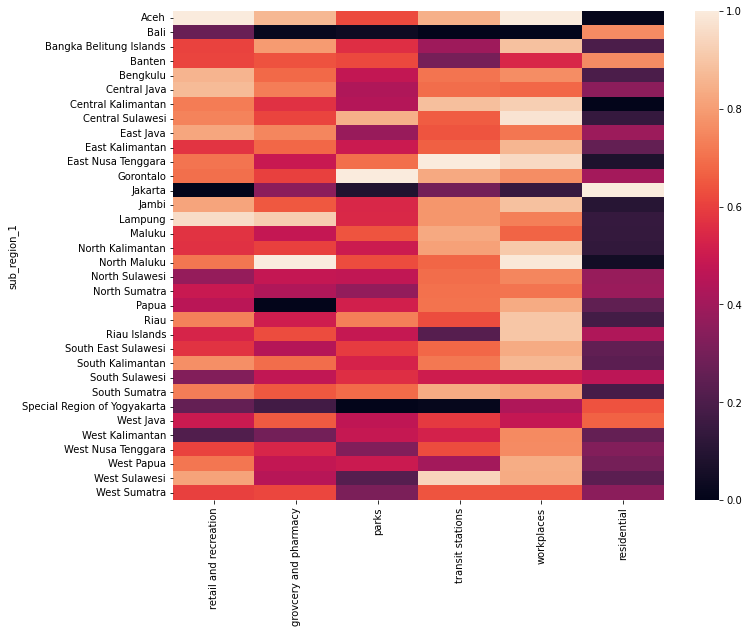

In [ ]:
fig,ax = plt.subplots(figsize=(11,9))
sns.heatmap(global_without_date)
plt.show()

In [ ]:
figure = px.bar(global_without_date, x=global_without_date.index, y='workplaces', labels={'x':'provinsi'},color="workplaces", color_continuous_scale=px.colors.sequential.Brwnyl)
figure.update_layout(title_text='Mobilitas Produktivitas Masyarakat Indonesia 2020')
figure.show()

In [ ]:
workplace = global_clean[['sub_region_1','date','workplaces']]
workplace.drop(workplace[workplace['sub_region_1'] != 'JAKARTA'].index, inplace = True)
workplace = workplace.drop(['sub_region_1'],axis = 1)
workplace

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,workplaces
48,2020-02,0.945783
49,2020-03,0.648594
50,2020-04,0.000000
51,2020-05,0.515395


In [ ]:
df_by_date = pd.DataFrame(global_data.groupby(['sub_region_1','date'])['workplaces_percent_change_from_baseline'].sum().sort_values(ascending=False).reset_index())
df_by_date['workplaces_percent_change_from_baseline'] = MinMaxScaler().fit_transform(np.array(df_by_date['workplaces_percent_change_from_baseline']).reshape(-1,1))
df_by_date.head(10)

,sub_region_1,date,workplaces_percent_change_from_baseline
0,West Sulawesi,2020-02-29,1.000000
1,West Sulawesi,2020-03-07,0.973451
2,West Sulawesi,2020-02-15,0.955752
3,West Sulawesi,2020-02-22,0.955752
4,West Sulawesi,2020-03-14,0.929204
5,East Kalimantan,2020-02-29,0.920354
6,East Kalimantan,2020-03-07,0.911504
7,East Kalimantan,2020-02-22,0.911504
8,East Kalimantan,2020-03-14,0.911504
9,East Kalimantan,2020-02-15,0.911504


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



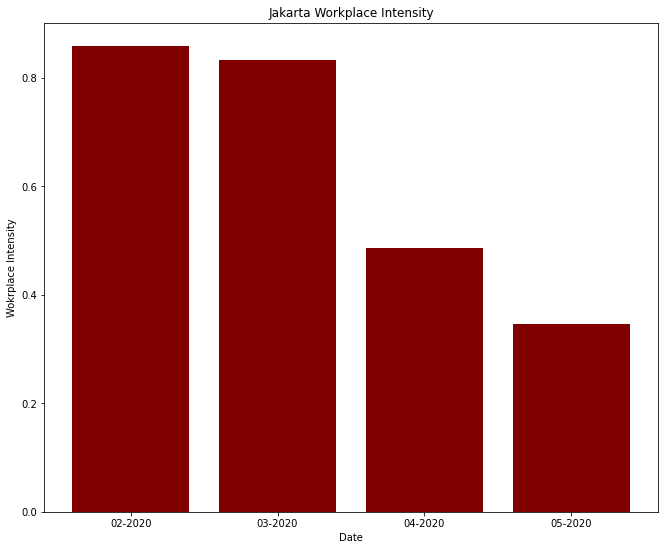

In [ ]:
fig = plt.figure(figsize = (11,9))
df_jakarta = df_by_date[df_by_date['sub_region_1'] == 'Jakarta']
df_jakarta['date'] = pd.to_datetime(df_jakarta['date'])
df_jakarta['date'] = [d.strftime('%m-%Y') if not pd.isnull(d) else '' for d in df_jakarta['date']]
x_plot = df_jakarta['date'].sort_values()
y_plot = df_jakarta['workplaces_percent_change_from_baseline']
 
# creating the bar plot
plt.bar(x_plot, y_plot, color ='maroon',
        width = 0.8)
 
plt.xlabel("Date")
plt.ylabel("Wokrplace Intensity")
plt.title("Jakarta Workplace Intensity")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



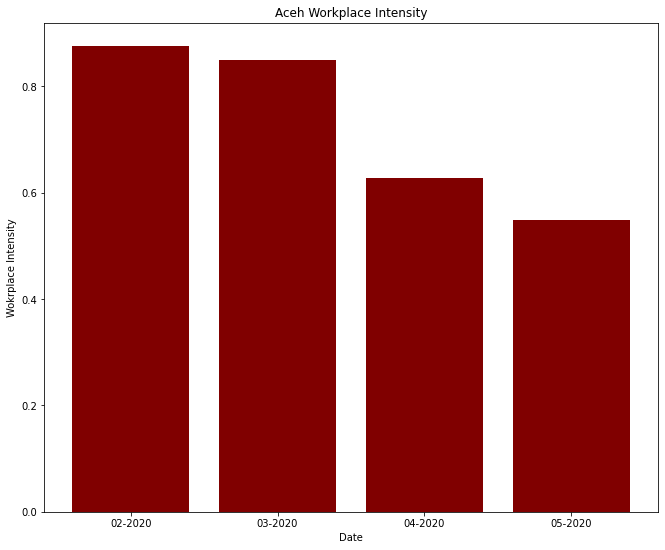

In [ ]:
fig = plt.figure(figsize = (11,9))
df_aceh = df_by_date[df_by_date['sub_region_1'] == 'Aceh']
df_aceh['date'] = pd.to_datetime(df_aceh['date'])
df_aceh['date'] = [d.strftime('%m-%Y') if not pd.isnull(d) else '' for d in df_aceh['date']]
x_plot = df_aceh['date'].sort_values()
y_plot = df_aceh['workplaces_percent_change_from_baseline']
 
# creating the bar plot
plt.bar(x_plot, y_plot, color ='maroon',
        width = 0.8)
 
plt.xlabel("Date")
plt.ylabel("Wokrplace Intensity")
plt.title("Aceh Workplace Intensity")
plt.show()

## Exploratory Data Analysis Polusi

Melakukan visualisasi pada polusi udara berdasarkan polutan partikulat (PM2.5) dikarenakan berdasarkan datasets yang kami dapatkan, di Indonesia sendiri, jumlah PM10 tidak signifikan sehingga PM2.5 menjadi partikel polutan yang dianalisis.

In [ ]:
df = pd.read_excel('air_pollution.xlsx')
df

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32126,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022,NaN
32127,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32128,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32129,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN


In [ ]:
#Since our scope is Indonesia and in Indonesia itself, the most significant pollutant is PM2.5, We need to drop another unimportant columns

df_clean = df.drop(['PM10 temporal coverage (%)','NO2 temporal coverage (%)','NO2 (μg/m3)','ISO3', 'Reference', 'Status', 'Number and type of monitoring stations', 'City or Locality', 'WHO Region', 'Version of the database' ], axis=1)
df_clean.rename(columns = {'WHO Country Name' : 'region'},inplace = True)

#Specify the country 
df_clean.drop(df_clean[df_clean['region'] != "Indonesia"].index, inplace = True)
df_clean.reset_index()
df_clean

,region,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),PM25 temporal coverage (%)
18519,Indonesia,2014,33.00,NaN,75.000000
18520,Indonesia,2016,44.86,NaN,90.536530
18521,Indonesia,2019,46.35,NaN,92.000000
18522,Indonesia,2015,33.55,NaN,2.773973
18523,Indonesia,2016,40.35,NaN,98.599727
18524,Indonesia,2017,28.09,NaN,96.152968
18525,Indonesia,2018,37.48,NaN,97.773973
18526,Indonesia,2015,29.42,NaN,3.013699
18527,Indonesia,2016,42.74,NaN,98.724954
18528,Indonesia,2017,32.03,NaN,89.200913


In [ ]:
df_clean.rename(columns = {'Measurement Year' : 'Year'},inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 18519 to 18530
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region                      12 non-null     object 
 1   Year                        12 non-null     int64  
 2   PM2.5 (μg/m3)               12 non-null     float64
 3   PM10 (μg/m3)                0 non-null      float64
 4   PM25 temporal coverage (%)  11 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 576.0+ bytes


In [ ]:
df_clean = df_clean.drop(columns =['region'],axis = 1)

In [ ]:
#Sort the table based on measurement year

df_clean.sort_values('Year',inplace = True)
df_clean

,Year,PM2.5 (μg/m3),PM10 (μg/m3),PM25 temporal coverage (%)
18530,2011,17.00,NaN,NaN
18519,2014,33.00,NaN,75.000000
18522,2015,33.55,NaN,2.773973
18526,2015,29.42,NaN,3.013699
18520,2016,44.86,NaN,90.536530
18523,2016,40.35,NaN,98.599727
18527,2016,42.74,NaN,98.724954
18524,2017,28.09,NaN,96.152968
18528,2017,32.03,NaN,89.200913
18525,2018,37.48,NaN,97.773973


In [ ]:
#Concantenate the data based on the measurement year

grouped= df_clean.groupby(['Year'],as_index = False).mean()

In [ ]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        7 non-null      int64  
 1   PM2.5 (μg/m3)               7 non-null      float64
 2   PM10 (μg/m3)                0 non-null      float64
 3   PM25 temporal coverage (%)  6 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 352.0 bytes


In [ ]:
# From the dataframe info above, we can infer that in Indonesia, there is no PM10 pollutant (or if it exists, the amount of the pollutant is insignificant)

grouped = grouped.drop(columns=['PM10 (μg/m3)'],axis = 1)
grouped = grouped.dropna()
grouped

,Year,PM2.5 (μg/m3),PM25 temporal coverage (%)
1,2014,33.000,75.000000
2,2015,31.485,2.893836
3,2016,42.650,95.953737
4,2017,30.060,92.676941
5,2018,41.250,96.372052
6,2019,46.350,92.000000


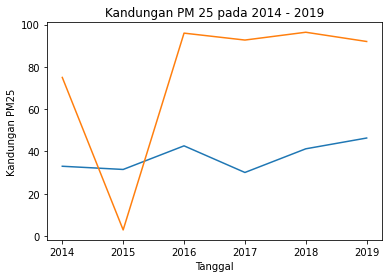

In [ ]:
# Generate a visualization graph based on the grouped and cleaned data above

x1 = grouped['Year']
y1 = grouped['PM2.5 (μg/m3)']
y2 = grouped['PM25 temporal coverage (%)']
plt.plot(x1,y1)
plt.plot(x1,y2)
plt.title('Kandungan PM 25 pada 2014 - 2019')
plt.xlabel("Tanggal")
plt.ylabel('Kandungan PM25')
plt.show()

In [ ]:
df_polution = pd.read_csv('indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-desember-tahun-2021.csv')
df_polution = df_polution.drop(['location','critical','categori'],axis = 1)
df_polution

,tanggal,pm10,pm25,so2,co,o3,no2,max
0,2021-12-01,63,100,43,13,41,30,100
1,2021-12-02,35,56,42,7,40,14,56
2,2021-12-03,54,71,43,9,48,17,71
3,2021-12-04,50,65,45,13,43,16,65
4,2021-12-05,53,80,44,17,39,29,80
5,2021-12-06,62,91,55,23,45,57,91
6,2021-12-07,179,58,44,12,43,21,179
7,2021-12-08,49,76,45,17,51,30,76
8,2021-12-09,46,63,46,11,51,20,63
9,2021-12-10,51,73,47,14,41,30,73


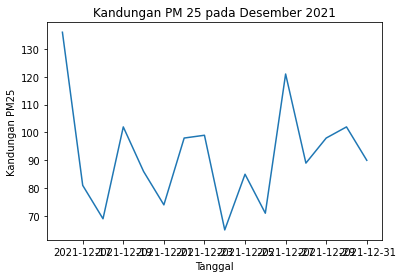

In [ ]:
df_polution['tanggal'] = pd.to_datetime(df_polution['tanggal'])
df_polution = df_polution[df_polution['tanggal'] > '2021-12-15']
a1 = df_polution['tanggal']
b1 = df_polution['pm25']
plt.plot(a1,b1)
plt.title('Kandungan PM 25 pada Desember 2021')
plt.xlabel("Tanggal")
plt.ylabel('Kandungan PM25')
plt.show()

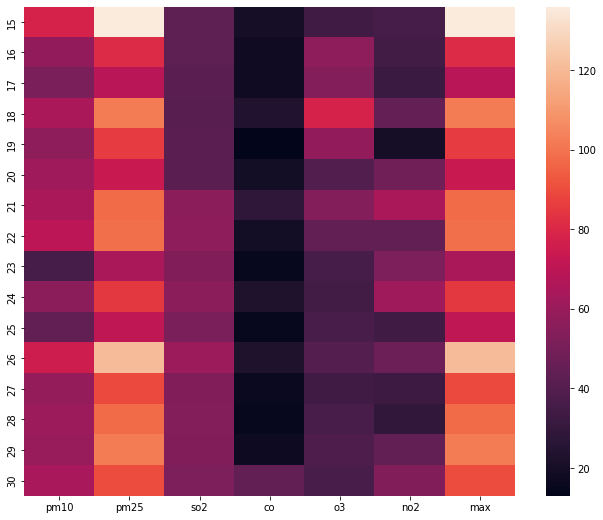

In [ ]:
fig,ax = plt.subplots(figsize=(11,9))
df_heat = df_polution.drop(['tanggal'],axis = 1)
sns.heatmap(df_heat)
plt.show()

# Modelling and Prediction

## Mobility Prediction

Melakukan prediksi berupa proyeksi visual terhadap mobilitas masyarakat menggunakan library prophet

In [ ]:
workplace

,date,workplaces
48,2020-02,0.945783
49,2020-03,0.648594
50,2020-04,0.000000
51,2020-05,0.515395


In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
workplace = workplace[['date','workplaces']]
workplace = workplace.rename(columns={'date': 'ds', 'workplaces': 'y'})

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
# df_polution_prediction.drop(['pm10', 'so2','co','o3','no2','max'], axis=1, inplace=True)
workplace

,ds,y
48,2020-02,0.945783
49,2020-03,0.648594
50,2020-04,0.000000
51,2020-05,0.515395


In [ ]:
from fbprophet import Prophet
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(workplace)

# Future dataframe with 1 year of data for each day
future_workplace_mobility=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_workplace_prediction=mc.predict(future_workplace_mobility)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


Text(0.5, 1.0, 'Forecasting of Mobility')

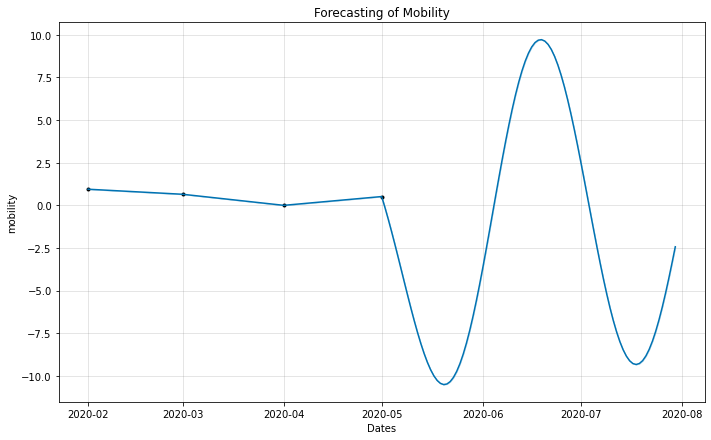

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_workplace_prediction, uncertainty=True, xlabel = 'Dates', ylabel = 'mobility')
plt.title('Forecasting of Mobility')

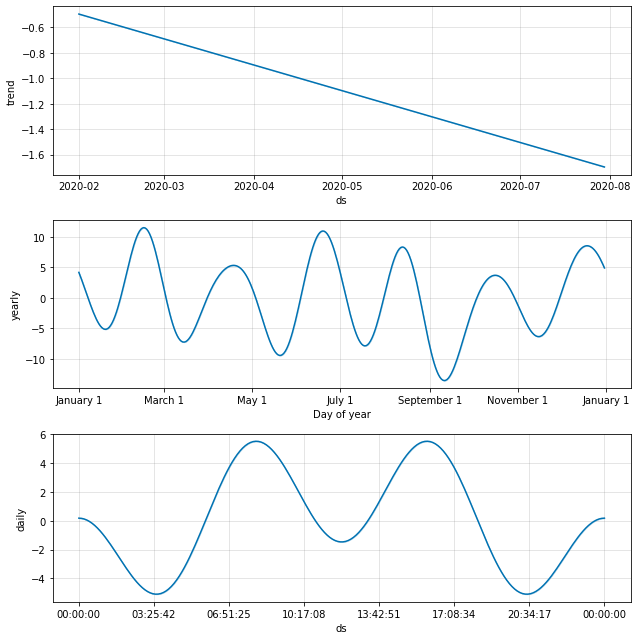

In [ ]:
fig = mc.plot_components(forecast_workplace_prediction)

## Time Series Covid

Melakukan prediksi berupa proyeksi visual terhadap kasus covid-19 (terkonfirmasi positif, meninggal, sembuh, dan isolasi)

In [ ]:
df_new_one

,Tanggal,Positif Harian,Meninggal,Self Isolation,Sembuh,Meninggal Per Hari,Sembuh Per Hari
0,2020-03-01,0,0,0,0,NaN,NaN
1,2020-03-02,0,0,0,0,0.0,0.0
2,2020-03-03,3,1,0,0,1.0,0.0
3,2020-03-04,0,1,0,0,0.0,0.0
4,2020-03-05,4,3,0,0,2.0,0.0
...,...,...,...,...,...,...,...
853,2022-07-02,983,15317,8675,1247144,1.0,1164.0
854,2022-07-03,931,15320,8333,1248357,3.0,1213.0
855,2022-07-04,737,15323,7937,1249496,3.0,1139.0
856,2022-07-05,1276,15325,8267,1250388,2.0,892.0


In [ ]:
df_new_one['Meninggal Per Hari'] = df_new_one['Meninggal Per Hari'].fillna(0).astype('int')
df_new_one['Sembuh Per Hari'] = df_new_one['Sembuh Per Hari'].fillna(0).astype('int')
df_new_one

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tanggal,Positif Harian,Meninggal,Self Isolation,Sembuh,Meninggal Per Hari,Sembuh Per Hari
0,2020-03-01,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0
2,2020-03-03,3,1,0,0,1,0
3,2020-03-04,0,1,0,0,0,0
4,2020-03-05,4,3,0,0,2,0
...,...,...,...,...,...,...,...
853,2022-07-02,983,15317,8675,1247144,1,1164
854,2022-07-03,931,15320,8333,1248357,3,1213
855,2022-07-04,737,15323,7937,1249496,3,1139
856,2022-07-05,1276,15325,8267,1250388,2,892


In [ ]:
df_new_one = df_new_one.drop(['Meninggal','Sembuh'],axis = 1)
df_new_one

,Tanggal,Positif Harian,Self Isolation,Meninggal Per Hari,Sembuh Per Hari
0,2020-03-01,0,0,0,0
1,2020-03-02,0,0,0,0
2,2020-03-03,3,0,1,0
3,2020-03-04,0,0,0,0
4,2020-03-05,4,0,2,0
...,...,...,...,...,...
853,2022-07-02,983,8675,1,1164
854,2022-07-03,931,8333,3,1213
855,2022-07-04,737,7937,3,1139
856,2022-07-05,1276,8267,2,892


In [ ]:
df_new_one.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Positif Harian,858.0,1487.510490,2514.949161,0.0,131.25,673.5,1409.0,15825.0
Self Isolation,858.0,9081.228438,15076.387118,0.0,1344.50,4260.0,8765.5,88295.0
Meninggal Per Hari,858.0,17.863636,27.873004,0.0,2.00,11.0,21.0,265.0
Sembuh Per Hari,858.0,1458.318182,2735.860653,0.0,123.25,617.0,1293.5,20570.0


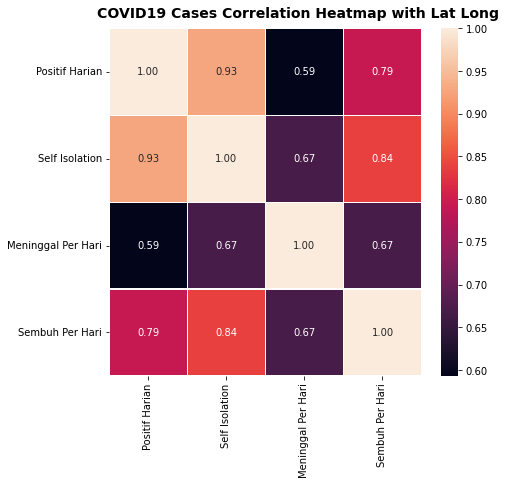

<Figure size 432x288 with 0 Axes>

In [ ]:
#sns.pairplot(train_data)
corr = df_new_one.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(7,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="rocket", # Color Map.
                 annot=True, 
                 fmt='.2f',
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('COVID19 Cases Correlation Heatmap with Lat Long', 
              fontsize=14, 
              fontweight='bold')
plt.figure()
plt.show()

Text(0.5, 0.98, 'COVID19 Cases Attributes Pairwise Plots')

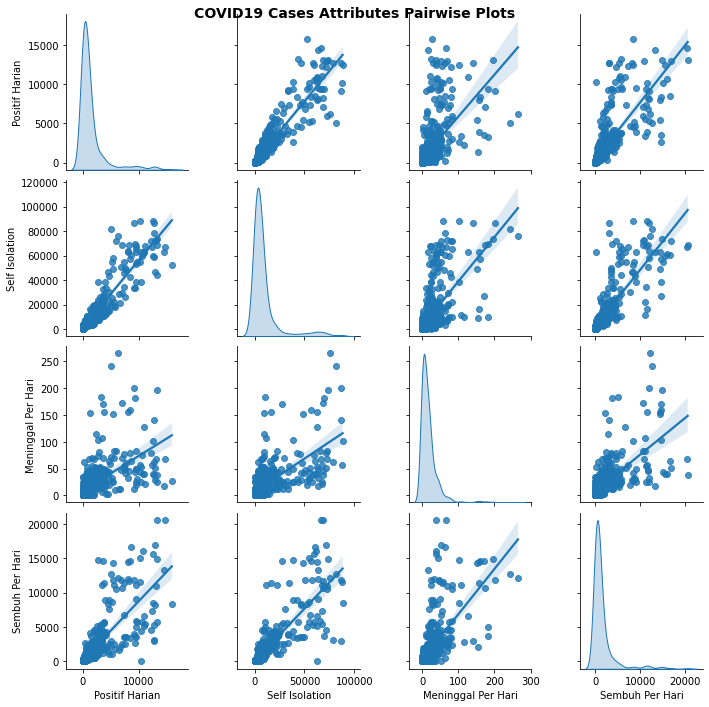

In [ ]:
plt.rcParams.update({'figure.max_open_warning': 0})
cols = ['Positif Harian', 
        'Self Isolation',
        'Meninggal Per Hari', 
        'Sembuh Per Hari']


pp = sns.pairplot(df_new_one[cols],palette="Set3",
                  diag_kws=dict(shade=True),
                  diag_kind="kde", # use "kde" for diagonal plots
                  kind="reg")

fig = pp.fig 
fig.subplots_adjust(top=0.97, wspace=0.4)
fig.suptitle('COVID19 Cases Attributes Pairwise Plots', fontsize=14, fontweight='bold')

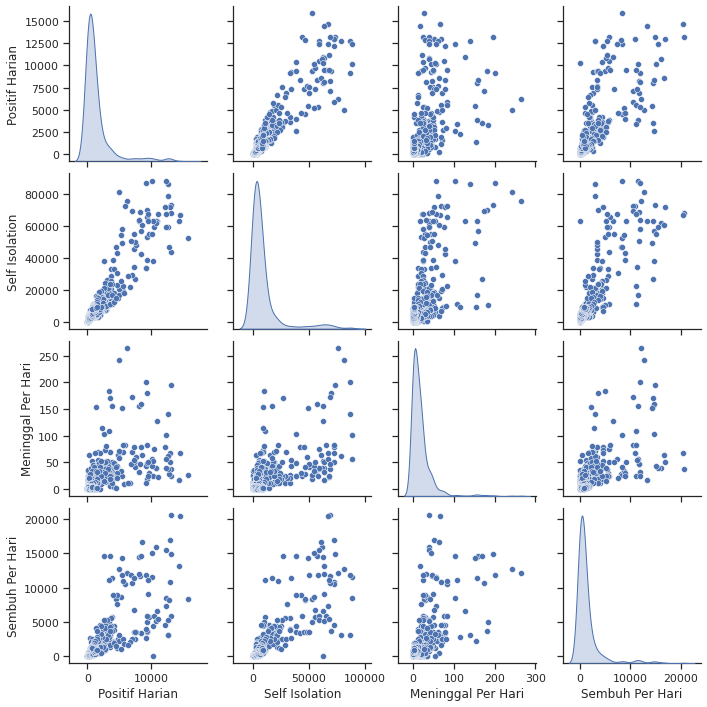

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_new_one, diag_kind="kde")

In [ ]:
df_new_one['Month'] = pd.to_datetime(df_new_one['Tanggal'])

In [ ]:
df_new_one['Month'] = [d.strftime('%Y-%m') if not pd.isnull(d) else '' for d in df_new_one['Month']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

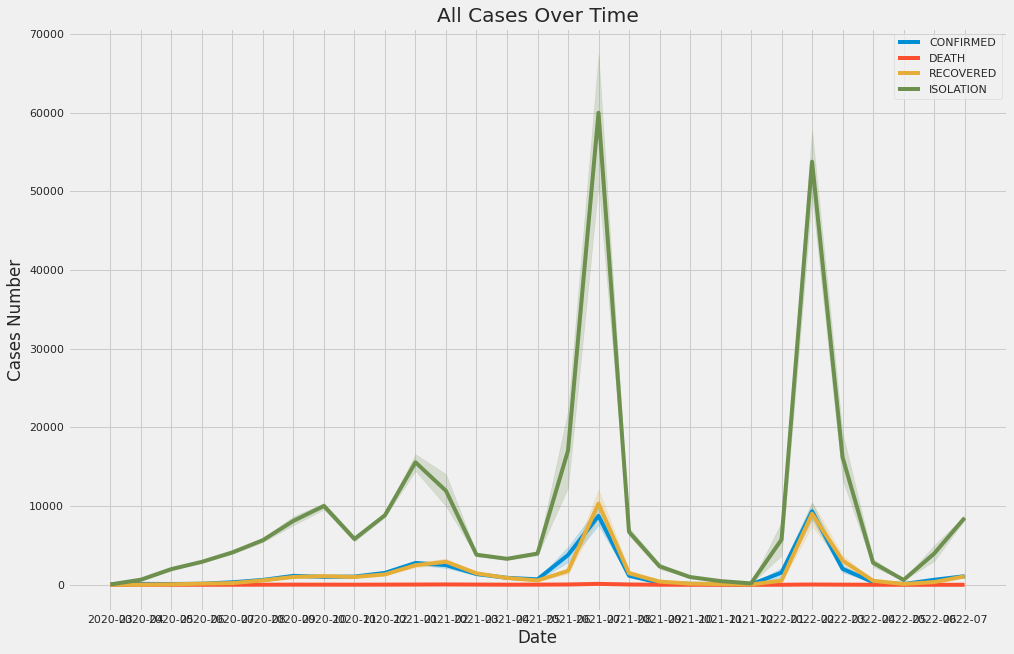

In [ ]:
plt.style.use('fivethirtyeight')
#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'


plt.figure(figsize=(15, 10))
sns.lineplot(df_new_one['Month'], df_new_one['Positif Harian'].tolist(), label = 'CONFIRMED')
sns.lineplot(df_new_one['Month'], df_new_one['Meninggal Per Hari'].tolist(), label = 'DEATH')
sns.lineplot(df_new_one['Month'], df_new_one['Sembuh Per Hari'].tolist(), label = 'RECOVERED')
sns.lineplot(df_new_one['Month'], df_new_one['Self Isolation'].tolist(), label = 'ISOLATION')

plt.xlabel('Date'); plt.ylabel('Cases Number'); plt.title('All Cases Over Time')
plt.legend();

In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
covid19confirmedcases = df_new_one[['Tanggal','Positif Harian']]
covid19confirmedcases = df_new_one.rename(columns={'Tanggal': 'ds', 'Positif Harian': 'y'})
covid19confirmedcases.drop(covid19confirmedcases[covid19confirmedcases['ds'] < '2022-02'].index, inplace = True)

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19confirmedcases.drop(['Meninggal Per Hari', 'Sembuh Per Hari','Self Isolation','Month'], axis=1, inplace=True)
covid19confirmedcases

,ds,y
702,2022-02-01,6388
703,2022-02-02,9132
704,2022-02-03,10317
705,2022-02-04,13179
706,2022-02-05,12774
...,...,...
853,2022-07-02,983
854,2022-07-03,931
855,2022-07-04,737
856,2022-07-05,1276


In [ ]:
covid19confirmedcases.head()

,ds,y
702,2022-02-01,6388
703,2022-02-02,9132
704,2022-02-03,10317
705,2022-02-04,13179
706,2022-02-05,12774


In [ ]:
from fbprophet import Prophet
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(covid19confirmedcases)

# Future dataframe with 1 year of data for each day
future_covid19confirmedcases=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_covid19confirmedcases=mc.predict(future_covid19confirmedcases)

## Covid 19 Confirmed Forecast

Text(0.5, 1.0, 'Forecasting of Confirmed Cases')

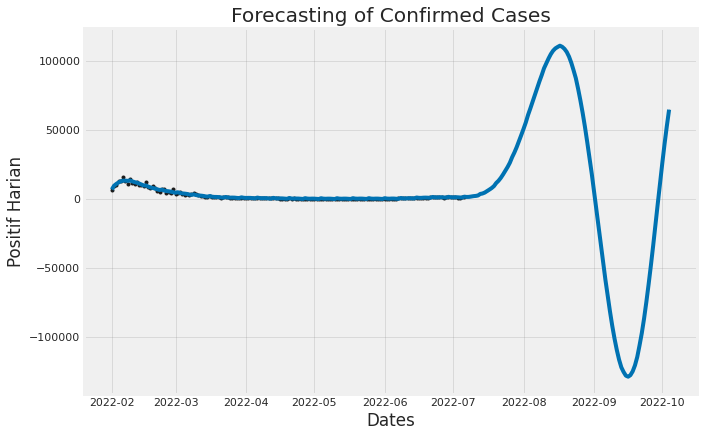

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_covid19confirmedcases, uncertainty=True, xlabel = 'Dates', ylabel = 'Positif Harian')
plt.title('Forecasting of Confirmed Cases')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


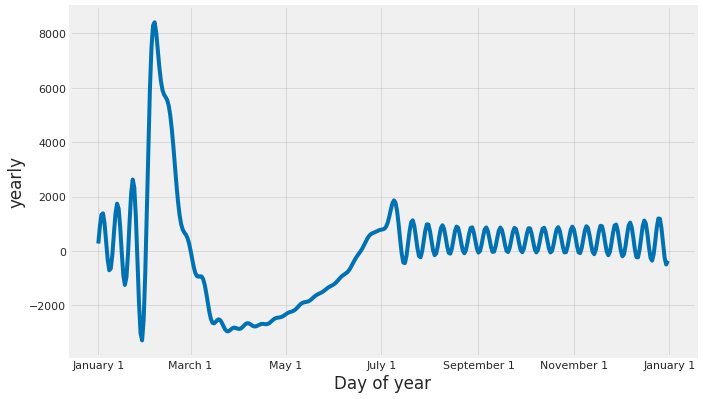

In [ ]:
from fbprophet.plot import plot_yearly
mr = Prophet(yearly_seasonality=40).fit(covid19confirmedcases)
a = plot_yearly(mr)

## Covid 19 Death Forecast

In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
covid19_meninggal_cases = df_new_one[['Tanggal','Meninggal Per Hari']]
covid19_meninggal_cases = df_new_one.rename(columns={'Tanggal': 'ds', 'Meninggal Per Hari': 'y'})
covid19_meninggal_cases.drop(covid19_meninggal_cases[covid19_meninggal_cases['ds'] < '2022-02'].index, inplace = True)

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19_meninggal_cases.drop(['Positif Harian', 'Sembuh Per Hari','Self Isolation','Month'], axis=1, inplace=True)
covid19_meninggal_cases

,ds,y
702,2022-02-01,12
703,2022-02-02,11
704,2022-02-03,24
705,2022-02-04,25
706,2022-02-05,29
...,...,...
853,2022-07-02,1
854,2022-07-03,3
855,2022-07-04,3
856,2022-07-05,2


In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(covid19_meninggal_cases)

# Future dataframe with 1 year of data for each day
future_covid19deathcases=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_covid19deathcases=mc.predict(future_covid19deathcases)

In [ ]:
forecast_covid19deathcases

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-01,3.320772,8.747782,22.303208,3.320772,3.320772,12.289259,12.289259,12.289259,48.882899,...,0.707702,0.707702,0.707702,-37.301343,-37.301343,-37.301343,0.0,0.0,0.0,15.610031
1,2022-02-02,3.356527,8.358317,21.892745,3.356527,3.356527,11.805463,11.805463,11.805463,48.882899,...,-1.468742,-1.468742,-1.468742,-35.608695,-35.608695,-35.608695,0.0,0.0,0.0,15.161990
2,2022-02-03,3.392282,11.843494,25.402027,3.392282,3.392282,15.466078,15.466078,15.466078,48.882899,...,-0.059542,-0.059542,-0.059542,-33.357279,-33.357279,-33.357279,0.0,0.0,0.0,18.858361
3,2022-02-04,3.428038,14.442328,28.007393,3.428038,3.428038,18.179180,18.179180,18.179180,48.882899,...,0.006410,0.006410,0.006410,-30.710129,-30.710129,-30.710129,0.0,0.0,0.0,21.607217
4,2022-02-05,3.463793,16.448272,29.593928,3.463793,3.463793,19.913703,19.913703,19.913703,48.882899,...,-1.149345,-1.149345,-1.149345,-27.819851,-27.819851,-27.819851,0.0,0.0,0.0,23.377496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2022-09-30,11.937777,398.123761,411.545842,11.937776,11.937778,392.773299,392.773299,392.773299,48.882899,...,0.006410,0.006410,0.006410,343.883990,343.883990,343.883990,0.0,0.0,0.0,404.711076
242,2022-10-01,11.973532,409.042643,421.983991,11.973531,11.973534,403.737633,403.737633,403.737633,48.882899,...,-1.149345,-1.149345,-1.149345,356.004079,356.004079,356.004079,0.0,0.0,0.0,415.711165
243,2022-10-02,12.009287,414.751177,428.325138,12.009286,12.009289,409.385552,409.385552,409.385552,48.882899,...,-0.430219,-0.430219,-0.430219,360.932871,360.932871,360.932871,0.0,0.0,0.0,421.394839
244,2022-10-03,12.045043,415.072740,428.247656,12.045041,12.045044,409.812006,409.812006,409.812006,48.882899,...,2.393736,2.393736,2.393736,358.535371,358.535371,358.535371,0.0,0.0,0.0,421.857049


Text(0.5, 1.0, 'Forecasting of Death Cases')

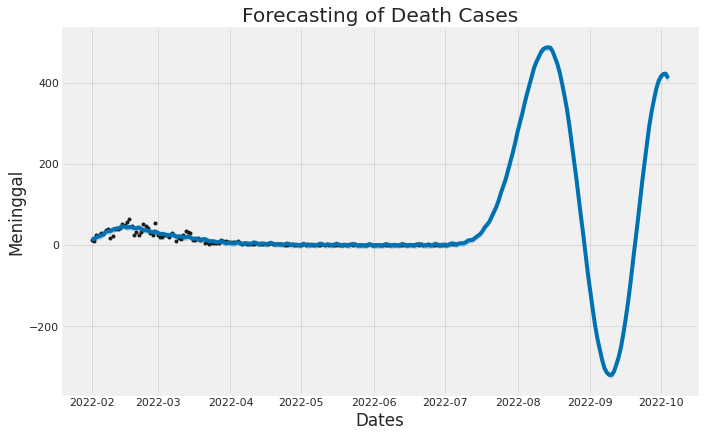

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_covid19deathcases, uncertainty=True, xlabel = 'Dates', ylabel = 'Meninggal')
plt.title('Forecasting of Death Cases')

## Covid 19 Cured Forecast

In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
covid19_cured_cases = df_new_one[['Tanggal','Sembuh Per Hari']]
covid19_cured_cases = df_new_one.rename(columns={'Tanggal': 'ds', 'Sembuh Per Hari': 'y'})
covid19_cured_cases.drop(covid19_cured_cases[covid19_cured_cases['ds'] < '2022-02'].index, inplace = True)

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19_cured_cases.drop(['Positif Harian', 'Meninggal Per Hari','Self Isolation','Month'], axis=1, inplace=True)
covid19_cured_cases

,ds,y
702,2022-02-01,1665
703,2022-02-02,4028
704,2022-02-03,4367
705,2022-02-04,5798
706,2022-02-05,8194
...,...,...
853,2022-07-02,1164
854,2022-07-03,1213
855,2022-07-04,1139
856,2022-07-05,892


In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(covid19_cured_cases)

# Future dataframe with 1 year of data for each day
future_covid19curedcases=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_covid19curedcases=mc.predict(future_covid19curedcases)

Text(0.5, 1.0, 'Forecasting of Cured Cases')

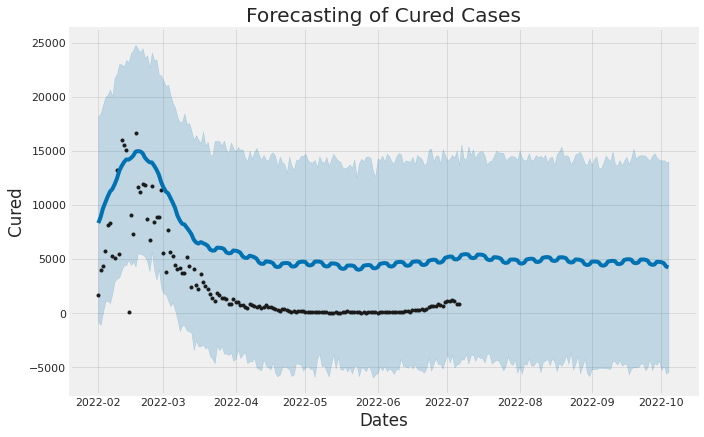

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_covid19curedcases, uncertainty=True, xlabel = 'Dates', ylabel = 'Cured')
plt.title('Forecasting of Cured Cases')

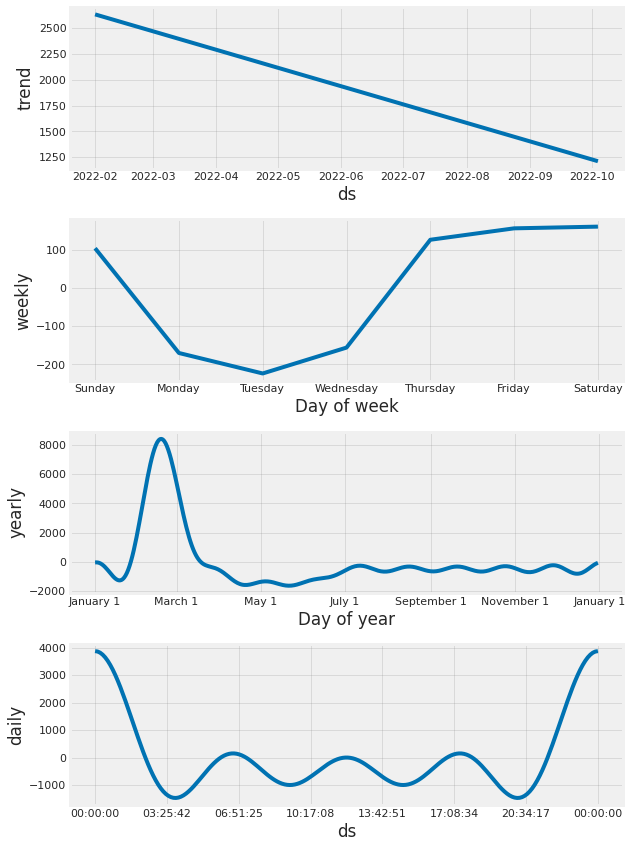

In [ ]:
fig = mc.plot_components(forecast_covid19curedcases)

## Covid 19 Isolation Forecast

In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
covid19_isolation_cases = df_new_one[['Tanggal','Self Isolation']]
covid19_isolation_cases = df_new_one.rename(columns={'Tanggal': 'ds', 'Self Isolation': 'y'})
covid19_isolation_cases.drop(covid19_isolation_cases[covid19_isolation_cases['ds'] < '2022-02'].index, inplace = True)

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19_isolation_cases.drop(['Positif Harian','Meninggal Per Hari','Sembuh Per Hari','Month'], axis=1, inplace=True)
covid19_isolation_cases

,ds,y
702,2022-02-01,28863
703,2022-02-02,33384
704,2022-02-03,38248
705,2022-02-04,43722
706,2022-02-05,46609
...,...,...
853,2022-07-02,8675
854,2022-07-03,8333
855,2022-07-04,7937
856,2022-07-05,8267


In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(covid19_isolation_cases)

# Future dataframe with 1 year of data for each day
future_covid19isolationcases=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_covid19isolationcases=mc.predict(future_covid19isolationcases)

Text(0.5, 1.0, 'Forecasting of Isolation Cases')

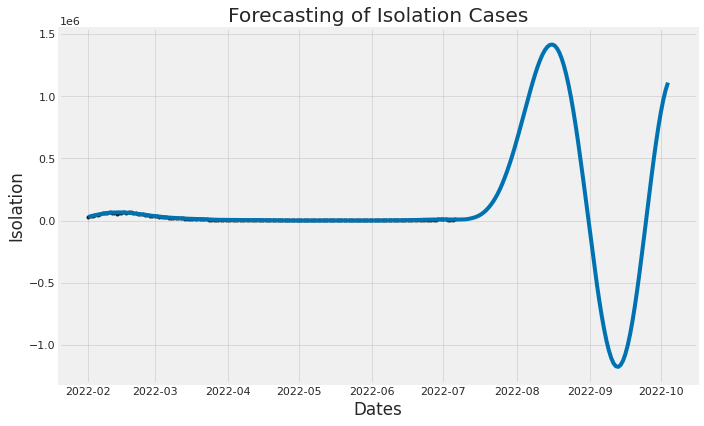

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_covid19isolationcases, uncertainty=True, xlabel = 'Dates', ylabel = 'Isolation')
plt.title('Forecasting of Isolation Cases')

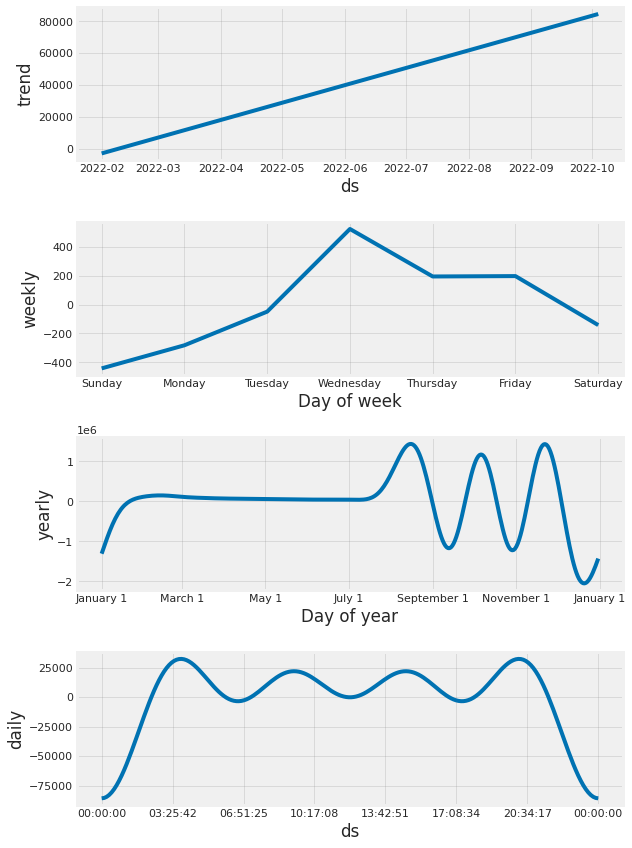

In [ ]:
fig = mc.plot_components(forecast_covid19isolationcases)

## Compare Trend with Prediction

Grafik Trend vs Prediction berfungsiuntuk membandingkan behaviour analysis dalam kurun waktu tertentu dengan hasil prediksi yang didapatkan pada analisis Time Series sebelumnya.

In [ ]:
confirmedcases_names = ['confirmedcases_%s' % column for column in forecast_covid19confirmedcases.columns]
deathcases_names = ['deathcases_%s' % column for column in forecast_covid19deathcases.columns]
curedcases_names = ['cured_%s' % column for column in forecast_covid19curedcases.columns]
isolationcases_names = ['isolation_%s' % column for column in forecast_covid19isolationcases.columns]

# Dataframes to merge
merge_confirmedcases_forecast = forecast_covid19confirmedcases.copy()
merge_deathcases_forecast = forecast_covid19deathcases.copy()
merge_curedcases_forecast = forecast_covid19curedcases.copy()
merge_isolationcases_forecast = forecast_covid19isolationcases.copy()
# Rename the columns
merge_confirmedcases_forecast.columns = confirmedcases_names
merge_deathcases_forecast.columns = deathcases_names
merge_curedcases_forecast.columns = curedcases_names
merge_isolationcases_forecast.columns = isolationcases_names

# Renaming the Date Columns
confirmedcases_forecast = merge_confirmedcases_forecast.rename(columns={'confirmedcases_ds': 'Date'})
deathcases_forecast = merge_deathcases_forecast.rename(columns={'deathcases_ds': 'Date'})
curedcases_forecast = merge_curedcases_forecast.rename(columns={'cured_ds': 'Date'})
isolationcases_forecast = merge_isolationcases_forecast.rename(columns={'isolation_ds': 'Date'})


In [ ]:
confirmedcases_forecast.drop(confirmedcases_forecast.iloc[:, 2:21], inplace = True, axis = 1)
deathcases_forecast.drop(deathcases_forecast.iloc[:, 2:21], inplace = True, axis = 1)
curedcases_forecast.drop(curedcases_forecast.iloc[:, 2:21], inplace = True, axis = 1)
isolationcases_forecast.drop(isolationcases_forecast.iloc[:, 2:21], inplace = True, axis = 1)

In [ ]:
confirmedcases_forecast.tail(1000)

,Date,confirmedcases_trend,confirmedcases_yhat
0,2022-02-01,-2290.325414,6740.387343
1,2022-02-02,-2221.013200,9483.644621
2,2022-02-03,-2151.700985,10808.057579
3,2022-02-04,-2082.388771,11892.126855
4,2022-02-05,-2013.076557,12744.439118
...,...,...,...
241,2022-09-30,14413.918247,11027.985535
242,2022-10-01,14483.230462,25699.743693
243,2022-10-02,14552.542676,39676.545500
244,2022-10-03,14621.854891,52656.986536


In [ ]:
deathcases_forecast.tail(1000)

,Date,deathcases_trend,deathcases_yhat
0,2022-02-01,3.320772,15.610031
1,2022-02-02,3.356527,15.161990
2,2022-02-03,3.392282,18.858361
3,2022-02-04,3.428038,21.607217
4,2022-02-05,3.463793,23.377496
...,...,...,...
241,2022-09-30,11.937777,404.711076
242,2022-10-01,11.973532,415.711165
243,2022-10-02,12.009287,421.394839
244,2022-10-03,12.045043,421.857049


In [ ]:
curedcases_forecast.tail(1000)

,Date,cured_trend,cured_yhat
0,2022-02-01,2635.362713,8342.589449
1,2022-02-02,2629.545212,8905.153271
2,2022-02-03,2623.727711,9698.746405
3,2022-02-04,2617.910210,10249.669002
4,2022-02-05,2612.092710,10778.391780
...,...,...,...
241,2022-09-30,1233.344516,4758.063325
242,2022-10-01,1227.527012,4726.431154
243,2022-10-02,1221.709508,4635.452092
244,2022-10-03,1215.892004,4329.372638


In [ ]:
isolationcases_forecast.tail(1000)

,Date,isolation_trend,isolation_yhat
0,2022-02-01,-3086.162047,2.829983e+04
1,2022-02-02,-2728.055096,3.459591e+04
2,2022-02-03,-2369.948146,3.945794e+04
3,2022-02-04,-2011.841195,4.415953e+04
4,2022-02-05,-1653.734245,4.805564e+04
...,...,...,...
241,2022-09-30,83217.613042,7.604408e+05
242,2022-10-01,83575.719993,8.730839e+05
243,2022-10-02,83933.826944,9.700811e+05
244,2022-10-03,84291.933894,1.049997e+06


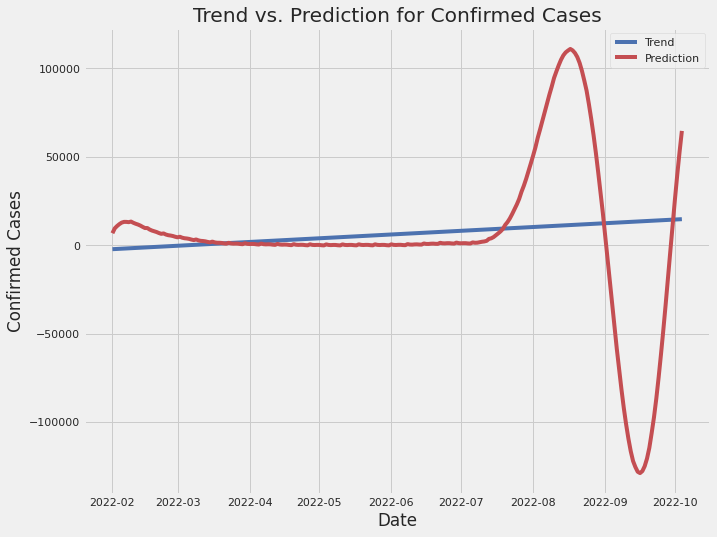

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(confirmedcases_forecast['Date'], confirmedcases_forecast['confirmedcases_trend'], 'b-', label = 'Trend')
plt.plot(confirmedcases_forecast['Date'], confirmedcases_forecast['confirmedcases_yhat'], 'r-', label = 'Prediction')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Confirmed Cases'); 
plt.title('Trend vs. Prediction for Confirmed Cases');

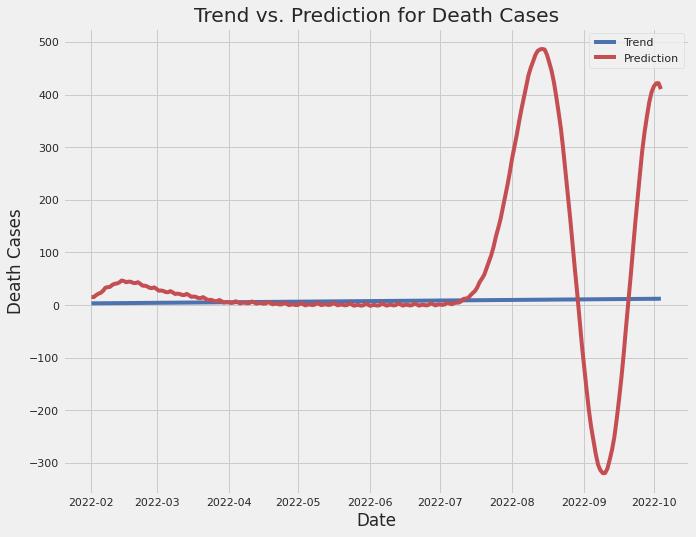

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(deathcases_forecast['Date'], deathcases_forecast['deathcases_trend'], 'b-', label = 'Trend')
plt.plot(deathcases_forecast['Date'], deathcases_forecast['deathcases_yhat'], 'r-', label = 'Prediction')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Death Cases'); 
plt.title('Trend vs. Prediction for Death Cases');

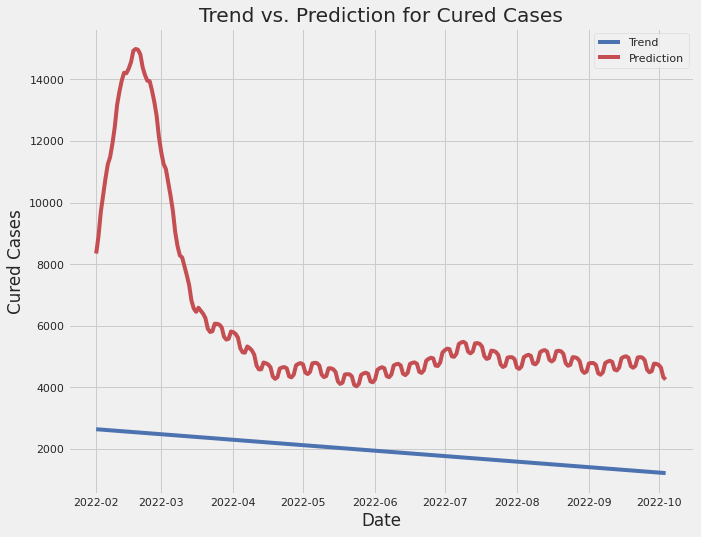

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(curedcases_forecast['Date'], curedcases_forecast['cured_trend'], 'b-', label = 'Trend')
plt.plot(curedcases_forecast['Date'], curedcases_forecast['cured_yhat'], 'r-', label = 'Prediction')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Cured Cases'); 
plt.title('Trend vs. Prediction for Cured Cases');

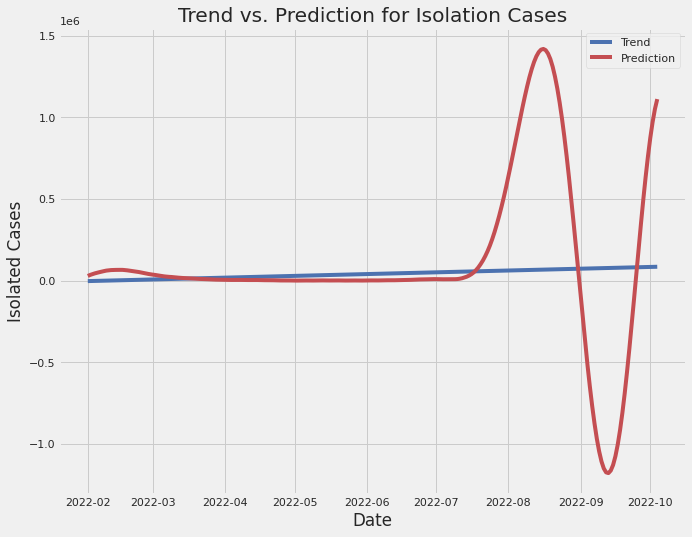

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(isolationcases_forecast['Date'], isolationcases_forecast['isolation_trend'], 'b-', label = 'Trend')
plt.plot(isolationcases_forecast['Date'], isolationcases_forecast['isolation_yhat'], 'r-', label = 'Prediction')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Isolated Cases'); 
plt.title('Trend vs. Prediction for Isolation Cases');

## Polution PM 25 Prediction

Melakukan prediksi dengan proyeksi visual terhadap pollutant dengan partikulat (PM2.5)

In [ ]:
df_polution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 15 to 30
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  16 non-null     datetime64[ns]
 1   pm10     16 non-null     int64         
 2   pm25     16 non-null     int64         
 3   so2      16 non-null     int64         
 4   co       16 non-null     int64         
 5   o3       16 non-null     int64         
 6   no2      16 non-null     int64         
 7   max      16 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.1 KB


In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
df_polution_prediction = df_polution[['tanggal','pm25']]
df_polution_prediction = df_polution_prediction.rename(columns={'tanggal': 'ds', 'pm25': 'y'})
df_polution_prediction.drop(df_polution_prediction[df_polution_prediction['ds'] < '2021-12-15'].index, inplace = True)

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
# df_polution_prediction.drop(['pm10', 'so2','co','o3','no2','max'], axis=1, inplace=True)
df_polution_prediction

,ds,y
15,2021-12-16,136
16,2021-12-17,81
17,2021-12-18,69
18,2021-12-19,102
19,2021-12-20,86
20,2021-12-21,74
21,2021-12-22,98
22,2021-12-23,99
23,2021-12-24,65
24,2021-12-25,85


In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(df_polution_prediction)

# Future dataframe with 1 year of data for each day
future_polution_prediction=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_polution_prediction=mc.predict(future_covid19curedcases)

INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


Text(0.5, 1.0, 'Forecasting of PM 25')

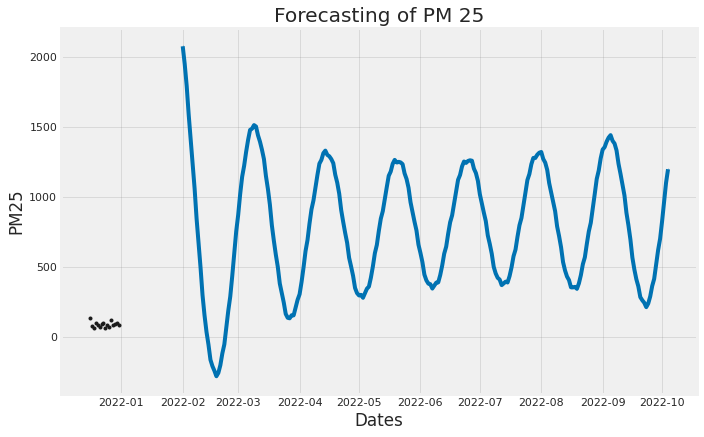

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_polution_prediction, uncertainty=True, xlabel = 'Dates', ylabel = 'PM25')
plt.title('Forecasting of PM 25')

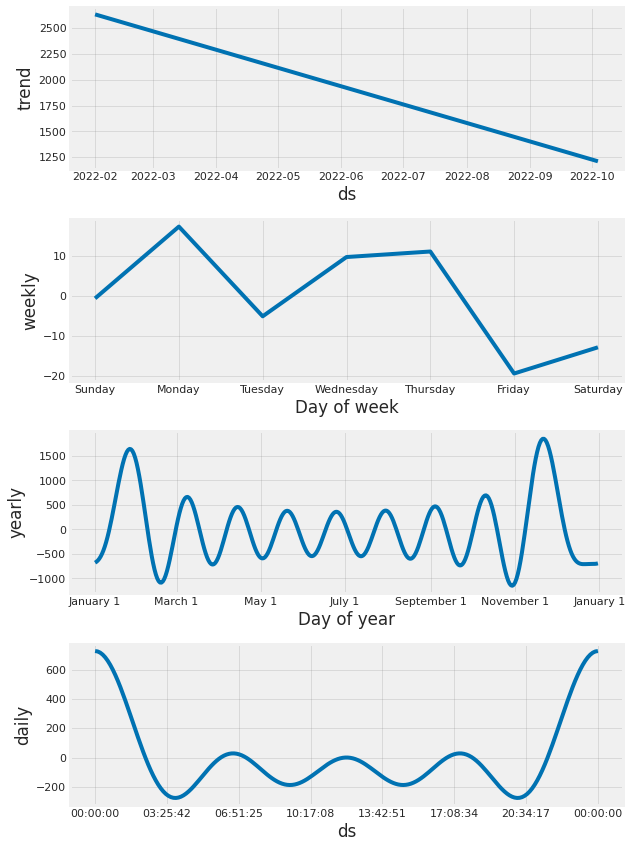

In [ ]:
fig = mc.plot_components(forecast_covid19curedcases)

## Polution CO Prediction

In [ ]:
df_polution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 15 to 30
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  16 non-null     datetime64[ns]
 1   pm10     16 non-null     int64         
 2   pm25     16 non-null     int64         
 3   so2      16 non-null     int64         
 4   co       16 non-null     int64         
 5   o3       16 non-null     int64         
 6   no2      16 non-null     int64         
 7   max      16 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.7 KB


In [ ]:
# Prophet Requires columns ds (Dates) and y (value)
df_co_prediction = df_polution[['tanggal','co']]
df_co_prediction = df_co_prediction.rename(columns={'tanggal': 'ds', 'co': 'y'})
df_co_prediction.drop(df_co_prediction[df_co_prediction['ds'] < '2021-12-15'].index, inplace = True)

In [ ]:
# Let's Drop columns Death Cases & Recovered Cases for this dataframe
# df_polution_prediction.drop(['pm10', 'so2','co','o3','no2','max'], axis=1, inplace=True)
df_co_prediction

,ds,y
15,2021-12-16,20
16,2021-12-17,18
17,2021-12-18,18
18,2021-12-19,24
19,2021-12-20,13
20,2021-12-21,19
21,2021-12-22,28
22,2021-12-23,19
23,2021-12-24,15
24,2021-12-25,23


In [ ]:
# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
mc=Prophet(changepoint_prior_scale=0.001, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
mc.fit(df_co_prediction)

# Future dataframe with 1 year of data for each day
future_co_prediction=mc.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()

# Make predictions
forecast_co_prediction=mc.predict(future_co_prediction)

INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


Text(0.5, 1.0, 'Forecasting of PM 25')

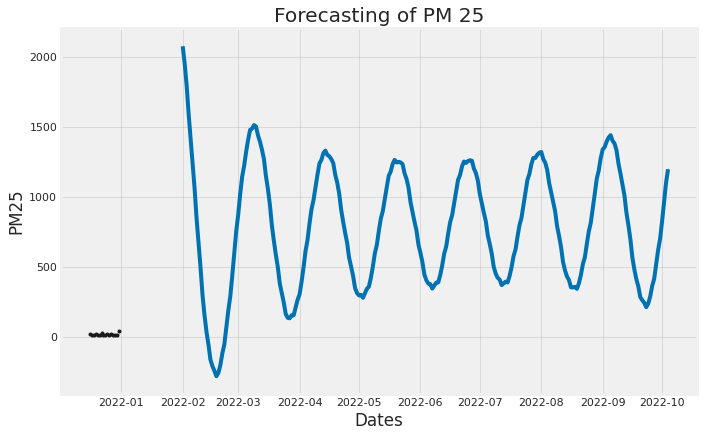

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = mc.plot(forecast_polution_prediction, uncertainty=True, xlabel = 'Dates', ylabel = 'PM25')
plt.title('Forecasting of PM 25')

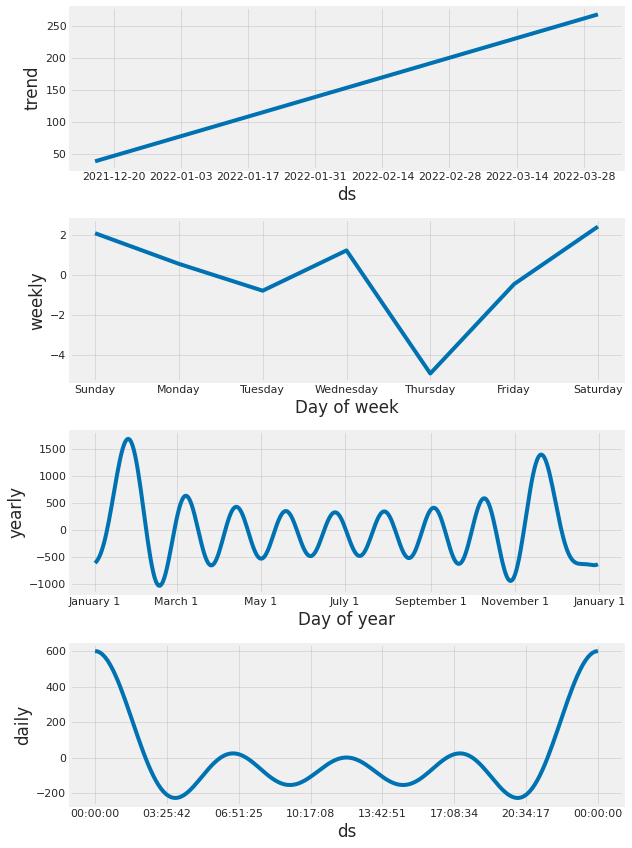

In [ ]:
fig = mc.plot_components(forecast_co_prediction)

# Conclusion

Pada Tahun 2020 menuju 2021, Pulau Jawa memiliki tingkat penyebaran COVID-19 terbanyak dengan mobilitas yang cukup rendah dikarenakan penerapan PPKM yang gesit, mobilitas mengalami penurunan yang cukup drastis dikarenakan pandemi, akan tetapi seiring dengan berjalannya waktu menuju 2022 dimana kasus covid - 19 akan menurun sebesar 47.6% setelah kenaikan pada bulan Februari 2022 menurut proyeksi Time Series kami yang berupa penurunan PM25 dan juga Karbon Monoksida sejak Februari 2022 sebesar 50%, akan tetapi proyeksi yang ditemukan. Hal ini menandakan bahwa terdapat relevansi antara COVID-19,mobilitas, dan juga Tingkat Polusi di Indonesia. Dengan adanya proyeksi ini dengan data yang valid,proyeksi yang kami lakukan dapat berakibat pada kewaspadaan pada peningkatan polusi di masa depan.

# Daftar Pustaka

Liao, F. L. (2022, May). An overview of effects of COVID-19 on mobility and lifestyle: 18 months since the outbreak. ScienceDirect. Retrieved July 10, 2022, from https://www.sciencedirect.com/science/article/pii/S0965856422000714

SLOCAT Partnership on Sustainable, Low Carbon Transport. (2020, August 19). Impacts of COVID-19 on Mobility - Preliminary analysis of regional trends on urban mobility. SLOCAT. https://slocat.net/covid-19-impact-mobility/Venter, Aunan, Chowdury, Lelieveld, Z. S. V. K. A. S. C. J. L. (2020, July 28). COVID-19 lockdowns cause global air pollution declines. Pnas. Retrieved July 10, 2022, from https://www.pnas.org/doi/10.1073/pnas.2006853117#:%7E:text=We%20find%20that%2C%20after%20accounting,with%20mixed%20effects%20on%20ozone

Wuhan market was epicentre of pandemic’s start, studies suggest. (2022, February 27). Nature. Retrieved July 10, 2022, from https://www.nature.com/articles/d41586-022-00584-8?error=cookies_not_supported&code=a83f1a04-787b-4210-9889-bcbf84583d3cYang, X. Y. (2021, July 1). 

Does city lockdown prevent the spread of COVID-19? New evidence from the synthetic control method. Biomedcentral. Retrieved July 10, 2022, from https://ghrp.biomedcentral.com/articles/10.1186/s41256-021-00204-4